
# Will the United Kingdom Meet its Greenhouse Gas Emission Targets?

**Sean Stewart (700164) and Enrique Fernández (585091)**

# Table of Contents:
1. [The Paris Climate Agreement](#The-Paris-Climate-Agreement)
2. [How does the UK compare to OECD?](#Who-are-the-largest-emitters-in-the-OECD?)
3. [Emissions trends in the United Kingdom](#Emissions-in-the-United-Kingdom)
4. [Secondary Analysis: US and Mexico](#Secondary-Analysis:-United-States-and-Mexico)
5.  [ARIMA Projection for the United Kingdom](#ARIMA-Projection-of-GHG-Emissions-in-the-UK)
    5.1 [2030 Projection](#2030-Goal:-Will-the-UK-meet-its-goal?)
    5.2 [2050 Projection](#2050-Goal-and-Projection)
6. [Conclusion](#Conclusion)


# Introduction 
The objective of this project is to provide a general overview of trends in greenhouse gas emissions (GHG) within the OECD, and specifically within the United Kingdom. We frame our analysis in the context of the Paris Climate Agreement and the Nationally Determined Contributions (NDC) set by each signatory of the agreement. We then follow the process found in Prananda, et al to develop a general autoregressive integrated moving average (ARIMA) model to forecast GHG emissions and evaluate whether the United Kingdom is projected to achieve its NDC target. We provide results only for the UK but this method can be easily adapted for any country. 

Our model suggests that the UK is likely to fulfill its NDC target of reducing its per capita emissions by 40% from the base year of 1990. We also went one step further, and projected whether the UK is likely to fulfill its self-imposed target outlined in the Climate Change Act (which was enshrined in British law in 2008) of reducing emissions by 80% by 2050.  Our model also suggests it will also meet this target. 

The work is organized as follows, first we motivate our work by introducing the green economy and growth concepts, second we talk about the Paris Agreement and its global implications, third we analyse the political context of the UK and proceed with the GHG analysis, finally we develop the ARIMA model and project where the UK's GHG emissions are going in the future.

# The Paris Climate Agreement

Climate change is undoubtedly one of the greatest challenges our society has ever faced. It will impact the geography, economy, and living standards of every country. More specifically, sectors such as agriculture, health, biodiversity, industry and tourism will all be directly impacted.

In a joint effort to counterbalance these effects,  196 countries signed the Paris Agreement on December 2015 and by 2017 a total of 146 countries ratified the agreement. Its main goal is to “keep global temperature rise below 2 degrees Celsius above pre-industrial levels and to pursue efforts to limit the temperature increase even further to 1.5 degrees Celsius” (UNFCCC,2019).

**Countries that joined the Paris Agreement**
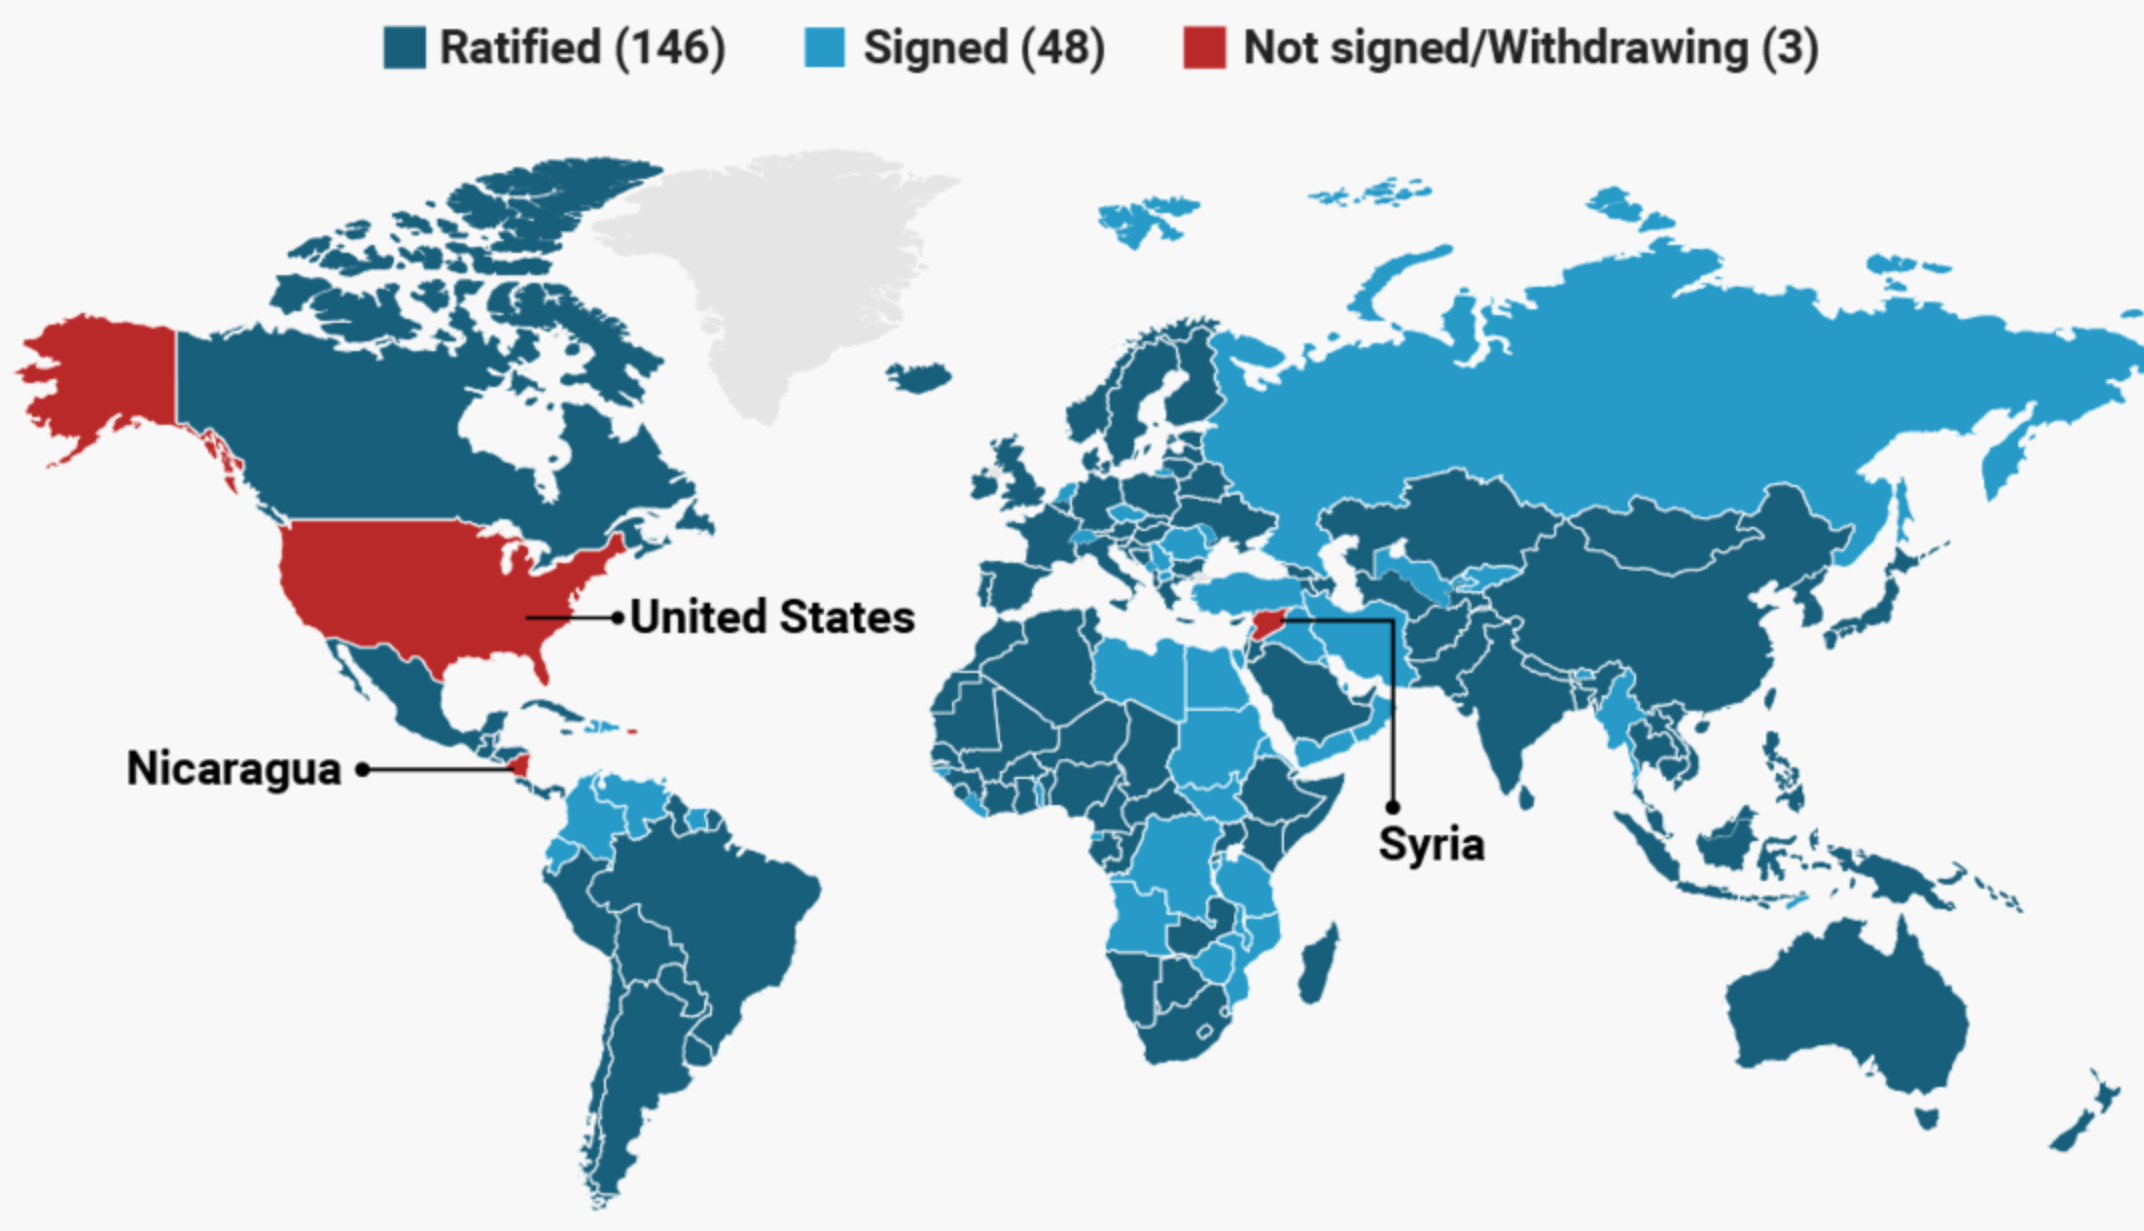

The agreement is ambitious, as it establishes the need for a greater adaptation to climate change capacity, vulnerability reduction and the guidelines to reach a climate resilient pathway. In particular, some key aspects of the Agreement include the long term temperature goal, peaking of Greenhouse Gas (GHG) emissions as soon as possible, mitigation and adaptation to climate change in order to strengthen the adaptive capacity and resilience, among others. To reach these goals it is required that all the countries subscribed coordinate to guarantee financial resources, technological innovation, capacity building and the support to underdeveloped countries.

As part of the Agreement every five years all parties are required to publish their specific actions taken to reduce the carbon emissions, these are known as the Nationally Determined Contributions (NDCs). It is important to highlight that countries have not had specific guidance on accounting for baseline mitigation targets which can arise to several problems like lack of ambition when setting the goal or “cherry picking” a model that guarantees that the target is being reached (OECD & IEA, 2018). With that in mind comparing across countries is relevant as can account for possible measurement biases within countries, nevertheless has to be taken with caution.

### Achieving Green Growth

The concept of the Green Economy was first used in 1989, in a report by the Center for Environmental Economics in London entitled "Guide for a Green Economy" (Blueprint for a Green Economy, 1989). The conclusion of this report establishes that a route to the Green Economy should be traced to achieve sustainable development using an approach of economic growth based on a disintegration of the capital stock into three equally important components: physical, human and natural capital (Pearce, Markandya, & Barbier, 1989).

The idea of Green Economy has become more important due to the increasing need to adopt measures that include sustainability in the development process of national economies and currently the concept fulfills a more integrated definition that considers economic activities, environmental sustainability and social welfare (Allen & Clouth, 2012).

In particular, the United Nations Environment Programme (UNEP), defined the Green Economy as one that improves human well-being and social equity, while significantly reducing environmental risks (UNEP, 2011). In other words, a Green Economy is distinguished by that which has low carbon emissions, uses resources efficiently and is socially inclusive.

UNEP emphasized that governments must start the transition from a traditional economy with intensive use of fossil fuels and environmental deterioration towards a Green Economy using natural resources sustainably. For this UNEP estimated a public investment package of approximately 3 billion USD that should be used in key areas like: 1) energy efficiency; 2) renewable energy (wind, solar, geothermal and biomass); 3) sustainable transport (hybrid vehicles, high-speed train systems and fast bus networks); 4) natural capital: fresh water, forests, soils and coral reefs; and 5) sustainable agriculture (UNEP, 2009).

Based on the Green Economy, The Organization for Economic Cooperation and Development (OECD) adopted the concept of green growth which means “fostering economic growth and development, while ensuring that natural assets continue to provide the resources and environmental services on which our well-being relies” (OECD,2018). 

#### Importing Libraries

In [1]:
#General Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

#ARIMA Forcasting
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA


#Define our plot style
plt.style.use('fivethirtyeight')

#### Importing and Organizing Data

We do this in two parts. First we import the data, second we transform it.

In [2]:
#OECD Greenhouse Gas Emissions - This is our main dataset
oecd_ghg = pd.read_excel('C:/Users/Maple/Desktop/Data/OECD_GHG.xlsx', header=0)

#Population Data from the World Bank
wb_pop = pd.read_excel('C:/Users/Maple/Desktop/Data/WB_Population.xlsx')

#GDP Data from the World Bank
wb_gdp = pd.read_csv('C:/Users/Maple/Desktop/Data/wb_gdp.csv', nrows = 265)

#Dataset that lists each country in the OECD
oecd_countries = pd.read_excel('C:/Users/Maple/Desktop/Data/OECD_Countries.xlsx')
oecd_countries = oecd_countries.set_index('Country Code')
oecd_cc = list(oecd_countries.index)

The main dataset we use is the [OECD Greenhouse Gas Emissions](https//stats.oecd.org/Index.aspx?DataSetCode=AIR_GHG). 
* First, we only want data on total Greenhouse gases in tonnes of CO2 equivalent, not other pollutants. 
* Second, we want to create a dataframe for each type of UNIT (total, per-capita, etc)
* Third, we want to transform a data into a matrix with dimensions of YEAR and Country Code

In [3]:
oecd_ghg.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,420100.3,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,421289.7,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426102.2,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426264.8,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426417.2,NaN,NaN


In [4]:
#List all variables included in the OECD_GHG dataset.
oecd_ghg.Variable.unique()

array(['Total emissions excluding LULUCF',
       'Total GHG excl. LULUCF, Index 1990=100',
       'Total GHG excl. LULUCF per capita', '5 - Waste',
       '2- Industrial processes and product use', '1 - Energy',
       '3 - Agriculture', '6 - Other',
       'Total GHG excl. LULUCF per unit of GDP',
       '1A1 - Energy Industries',
       'Land use, land-use change and forestry (LULUCF)',
       '1A4 - Other sectors', '1A5 - Energy - Other',
       '1B - Fugitive Emissions from Fuels',
       '1A2 - Manufacturing industries and construction',
       '1A3 - Transport', 'Total emissions including LULUCF',
       'Total GHG excl. LULUCF, Index 2000=100',
       '1C - CO2 from Transport and Storage',
       'Agriculture, Forestry and Other Land Use (AFOLU)'], dtype=object)

In [5]:
#Only keep Greenhouse Gases 'GHG', in 'Tonnes of CO2 Equivalent'
#This enables us to analyze emissions from all pollutants objectively
oecd_ghg=oecd_ghg[oecd_ghg.POL== "GHG"] 

#We use the .pivot method to help shape our data. To simplify this process we wrote a method. 
def pivot_table(df):
  return df.pivot(index='Year', columns='COU', values='Value')

#We separate each UNIT into a new dataframe. 

#Dataframe 1 - Total emissions including LULUCF
oecd_ghg_total = pivot_table(oecd_ghg[oecd_ghg.Variable== "Total emissions including LULUCF"])

#Dataframe 1.1 - Total emissions excluding LULUCF
oecd_ghg_total_ex = pivot_table(oecd_ghg[oecd_ghg.Variable== "Total emissions excluding LULUCF"])

#Dataframe 2 - Total Emissions from Energy
oecd_ghg_ener_total = pivot_table(oecd_ghg[oecd_ghg.Variable== "1 - Energy"])

#Dataframe 3 - Total Emissions from Industrial processes and product use
oecd_ghg_indust = pivot_table(oecd_ghg[oecd_ghg.Variable== "2- Industrial processes and product use"])

#Dataframe 3.1-3.7 - Emissions from Compoents of the Energy Industry
oecd_energy_1A1 = pivot_table(oecd_ghg[oecd_ghg.Variable== "1A1 - Energy Industries"])
oecd_energy_1A2 = pivot_table(oecd_ghg[oecd_ghg.Variable== "1A2 - Manufacturing industries and construction"])
oecd_energy_1A3 = pivot_table(oecd_ghg[oecd_ghg.Variable== "1A3 - Transport"])
oecd_energy_1A4 = pivot_table(oecd_ghg[oecd_ghg.Variable== "1A4 - Other sectors"])
oecd_energy_1A5 = pivot_table(oecd_ghg[oecd_ghg.Variable== "1A5 - Energy - Other"])
oecd_energy_1B  = pivot_table(oecd_ghg[oecd_ghg.Variable== "1B - Fugitive Emissions from Fuels"])

#Dataframe 4 - Emissions from Agriculture
oecd_ghg_agri = pivot_table(oecd_ghg[oecd_ghg.Variable== "3 - Agriculture"])

#Dataframe 5 - Emissions from Waste
oecd_ghg_waste = pivot_table(oecd_ghg[oecd_ghg.Variable== "5 - Waste"])

#Dataframe 6 - Total Emissions INDEX = 2000
oecd_ghg_2000 = pivot_table(oecd_ghg[oecd_ghg.Variable== "Total GHG excl. LULUCF, Index 2000=100"])

#Dataframe 7 - Total emissions PER CAPITA
oecd_ghg_per_cap = pivot_table(oecd_ghg[oecd_ghg.Unit== "Kilograms per capita"])

#Datafram 8 - Land use, land-use change and forestry (LULUCF)
oecd_ghg_lu = pivot_table(oecd_ghg[oecd_ghg.Variable== "Land use, land-use change and forestry (LULUCF)"])

#Dataframe 9 - Emissions per Unit of GDP
oecd_ghg_gdp = pivot_table(oecd_ghg[oecd_ghg.Variable== "Total GHG excl. LULUCF per unit of GDP"])

In [6]:
oecd_ghg_total.head()

COU,ARG,AUS,AUT,BEL,CAN,CHE,CHL,CHN,COL,CZE,...,OECD,OECDE,POL,PRT,RUS,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
1990,287931.1,576800.5,66708.16,144220.3,535510.0,52465.80,7998.015,NaN,201064.6,190912.8,...,13787312.0,5335270.0,439676.8,60980.06,3893153.0,64434.34,14417.68,35589.40,181792.0,5536014.0
1991,299381.2,553217.7,65810.95,146931.7,521441.0,50846.26,9312.159,NaN,NaN,169215.6,...,13673873.0,5286757.0,435402.8,62710.38,3712718.0,54134.82,13800.63,36475.96,188173.7,5470903.0
1992,304367.0,517923.9,64132.52,146556.8,547275.4,50998.72,8477.390,NaN,NaN,161806.1,...,13721575.0,5175663.0,443710.2,62764.70,3049307.0,48023.85,13867.52,35913.40,201743.6,5598601.0
1993,311081.9,496201.9,63893.07,145568.0,554223.1,48008.34,11592.330,NaN,NaN,154305.7,...,13774829.0,5086555.0,437807.3,60322.64,2781128.0,44718.76,14019.75,41252.55,203473.7,5727002.0
1994,316391.5,493161.5,64554.10,150228.1,574181.9,48800.81,14524.080,3650138.0,NaN,148931.6,...,13935806.0,5046753.0,431593.4,60556.79,2406973.0,42501.82,14201.74,39601.41,195988.2,5790630.0


Before we continue, we noticed that not every country has data available for each variable. In particular, Mexico does not have data for '1A4 - Other sectors', and '1A5 - Energy - Other'. To make sure that we don't run into a problem further in our analysis, we will insert a column for Mexico into these two dataframes, and fill them with 0's. 

In [7]:
oecd_energy_1A5['MEX'] = 0
oecd_energy_1B['MEX'] = 0

Now that the OECD data is formated, lets move to the World Bank Datasets. 

In [8]:
#Inspect WB Data
wb_pop.head()

,Series Name,Series Code,Country Name,Country Code,1968,1969,1970,1971,1972,1973,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,10604346,10854428,11126123,11417825,11721940,12027822,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
1,"Population, total",SP.POP.TOTL,Albania,ALB,2022272,2081695,2135479,2187853,2243126,2296752,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
2,"Population, total",SP.POP.TOTL,Algeria,DZA,13744387,14144438,14550034,14960109,15377093,15804428,...,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528,40606052,41318142
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,25885,26614,27292,27916,28492,29014,...,57030,56227,55637,55320,55230,55307,55437,55537,55599,55641
4,"Population, total",SP.POP.TOTL,Andorra,AND,21890,23058,24276,25559,26892,28232,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965


In [9]:
#Filter the dataset by 'SP.POP.TOTL'
tot_pop = wb_pop[wb_pop['Series Code']=='SP.POP.TOTL']

drop_columns = ['Series Name', 'Series Code', 'Country Name']

tot_pop = tot_pop.drop(drop_columns, axis=1)
tot_pop = tot_pop.set_index('Country Code')
tot_pop = tot_pop.T

In [10]:
tot_pop.head()

Country Code,AFG,ALB,DZA,ASM,AND,AGO,ATG,ARG,ARM,ABW,...,URY,UZB,VUT,VEN,VNM,VIR,PSE,YEM,ZMB,ZWE
1968,10604346,2022272,13744387,25885,21890,6523791,64655,23261278,2401140,58386,...,2774774,11323095,80673,10881995,41195835,55700,..,5971407,3912085,4851431
1969,10854428,2081695,14144438,26614,23058,6642632,65910,23605987,2462925,58726,...,2795046,11723846,82940,11235491,42309665,60300,..,6083619,4038923,5009514
1970,11126123,2135479,14550034,27292,24276,6776381,67098,23973058,2525065,59063,...,2809803,12110028,85389,11587761,43407287,63476,..,6193810,4173928,5175618
1971,11417825,2187853,14960109,27916,25559,6927269,68188,24366439,2587706,59440,...,2818270,12477058,88022,11937805,44485908,70937,..,6300554,4317748,5351195
1972,11721940,2243126,15377093,28492,26892,7094834,69176,24782949,2650484,59840,...,2821439,12828625,90823,12286439,45549483,76319,..,6407295,4469895,5535874


In [11]:
#We repeat this process for GDP

#GDP Data from the World Bank
wb_gdp = wb_gdp.set_index('Country Code')
drop_columns = ['Country Name', 'Indicator Code', 'Indicator Name']
wb_gdp = wb_gdp.drop(drop_columns, axis=1 )
wb_tot_gdp = wb_gdp.T

In [12]:
#wb_gdp
wb_tot_gdp[oecd_cc].tail()

Country Code,AUS,AUT,BEL,CAN,CZE,DNK,EST,FIN,FRA,DEU,...,POL,PRT,SVK,SVN,ESP,SWE,CHE,TUR,GBR,USA
2014,1.098650e+12,4.169550e+11,4.999390e+11,1.617560e+12,3.395830e+11,2.703310e+11,3.751505e+10,2.264900e+11,2.662030e+12,3.813670e+12,...,9.735660e+11,2.989960e+11,1.567490e+11,6.362054e+10,1.566850e+12,4.511040e+11,5.068950e+11,1.851030e+12,2.630220e+12,1.742760e+13
2015,1.102390e+12,4.311240e+11,5.120160e+11,1.599830e+12,3.529630e+11,2.766430e+11,3.773767e+10,2.305300e+11,2.701320e+12,3.905510e+12,...,1.009590e+12,3.058990e+11,1.601220e+11,6.493594e+10,1.617120e+12,4.692960e+11,5.271600e+11,1.944650e+12,2.708050e+12,1.812070e+13
2016,1.117190e+12,4.413890e+11,5.259690e+11,1.625360e+12,3.671720e+11,2.808390e+11,3.913599e+10,2.383760e+11,2.765190e+12,4.030400e+12,...,1.041130e+12,3.165640e+11,1.654240e+11,6.757452e+10,1.687610e+12,4.852840e+11,5.349030e+11,2.007470e+12,2.798060e+12,1.862450e+13
2017,1.192070e+12,4.615830e+11,5.440420e+11,1.714450e+12,3.847540e+11,2.963510e+11,4.175601e+10,2.472690e+11,2.876060e+12,4.187580e+12,...,1.105940e+12,3.260300e+11,1.719900e+11,7.206381e+10,1.769640e+12,5.054830e+11,5.478540e+11,2.141270e+12,2.856700e+12,1.939060e+13
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# How does the UK compare to the OECD?

Lets start by looking at total GHG emissions for each country in the OECD in 2015. We choose this year since most members of the OECD have data available for this year (with the exception of Chile which we do not include).

Lets define a method to graph our data. For comparing total emissions at a single point in time, a bar graph will most clearly highlight the differences among countries.

In [13]:
#This method takes as an argument 1) a dataframe, 2) countries we want to graph, 3) year, 4) title 5) x-axis label

def bar_graph(data, countries, year, title, x_label):
    plt.figure(figsize=(18,10))
    pos = np.arange(len(data[countries].loc[year]))
    plt.bar(pos,data[countries].loc[year].sort_values())
    plt.xticks(pos,data[countries].loc[year].sort_values().index)
    plt.xticks(rotation=90)
    plt.ylabel(x_label)
    plt.xlabel('Country')
    plt.title(title)
    plt.show()

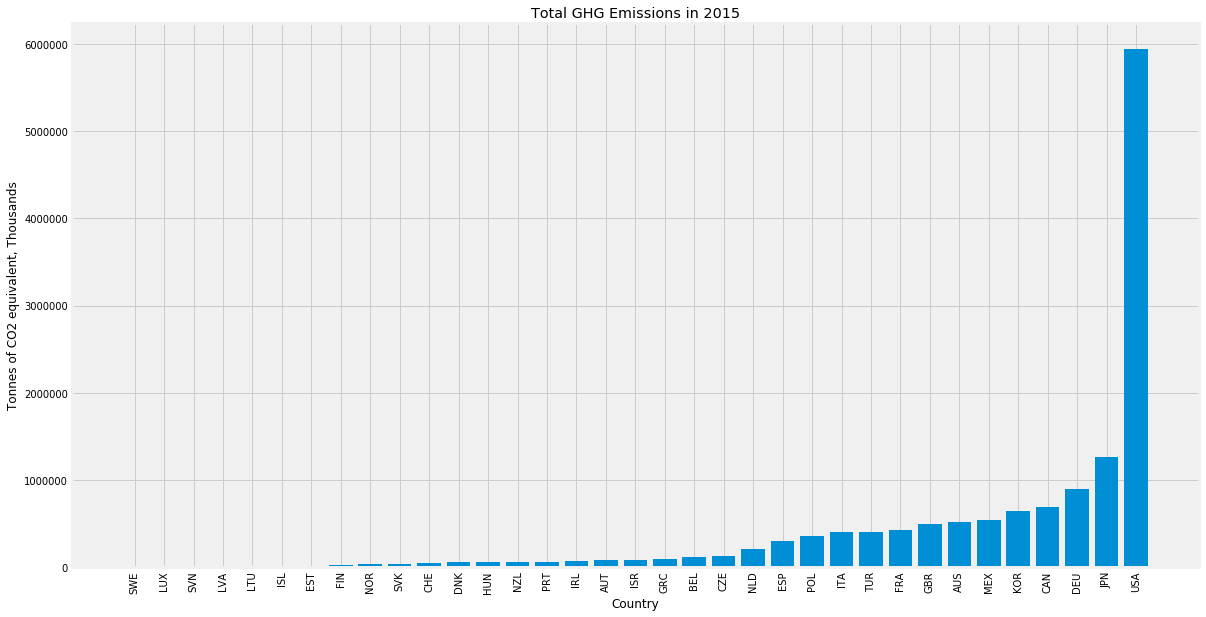

In [14]:
bar_graph(oecd_ghg_total, oecd_cc, 2015, 'Total GHG Emissions in 2015', 'Tonnes of CO2 equivalent, Thousands')

Clearly, the USA is the largest emitter of greenhouse gases in the OECD, followed by Japan, Germany, and Canada. One would expect the US to have the most emissions since they are the most populous country, and have the largest economy. The UK is the 7th largest emitter in the OECD. Lets see how they compare on a per capita basis. 

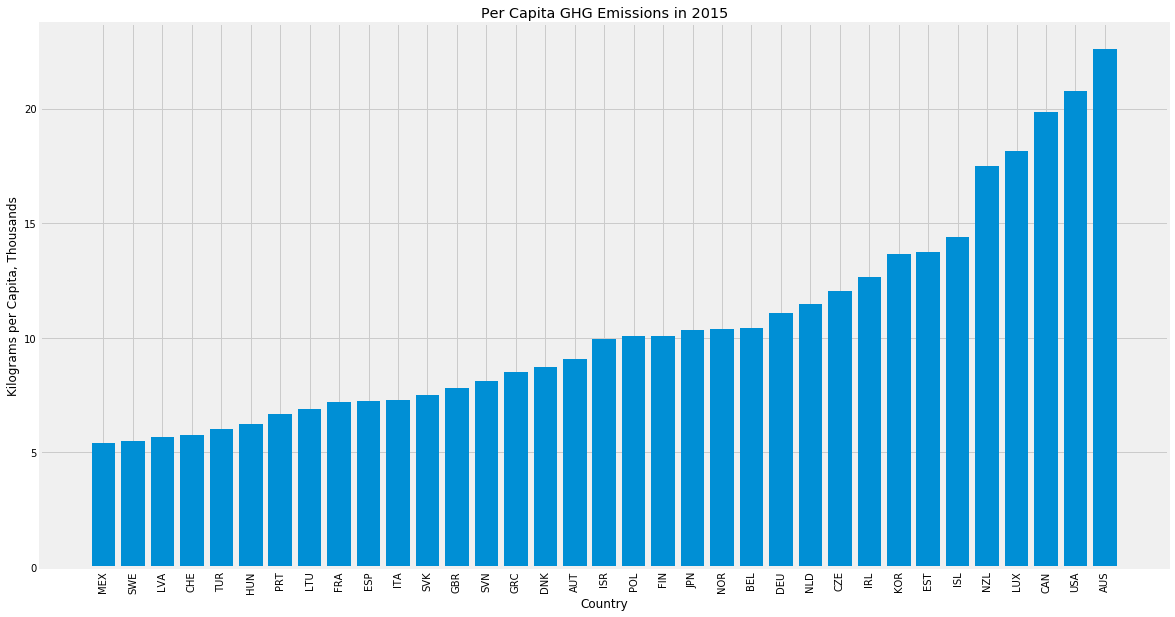

In [15]:
bar_graph(oecd_ghg_per_cap, oecd_cc, 2015, 'Per Capita GHG Emissions in 2015', 'Kilograms per Capita, Thousands')

Total emissions per capita changes our perspective on how green an economy is. While the US the second largest emitter, Mexico went from being the 6th largests total emitter in the OECD, to the smallest emitter in per capita terms. This is probably due to the fact that Mexico is a populous nation while also being one of the least developed in the OECD. The UK went from being the 7th largest emitter, to the 23rd largest emitter in per-capita terms. And note that the United Kingdom has lower per-capita emissions than many other countries in the EU. 

Now lets look at emissions per units of GDP.

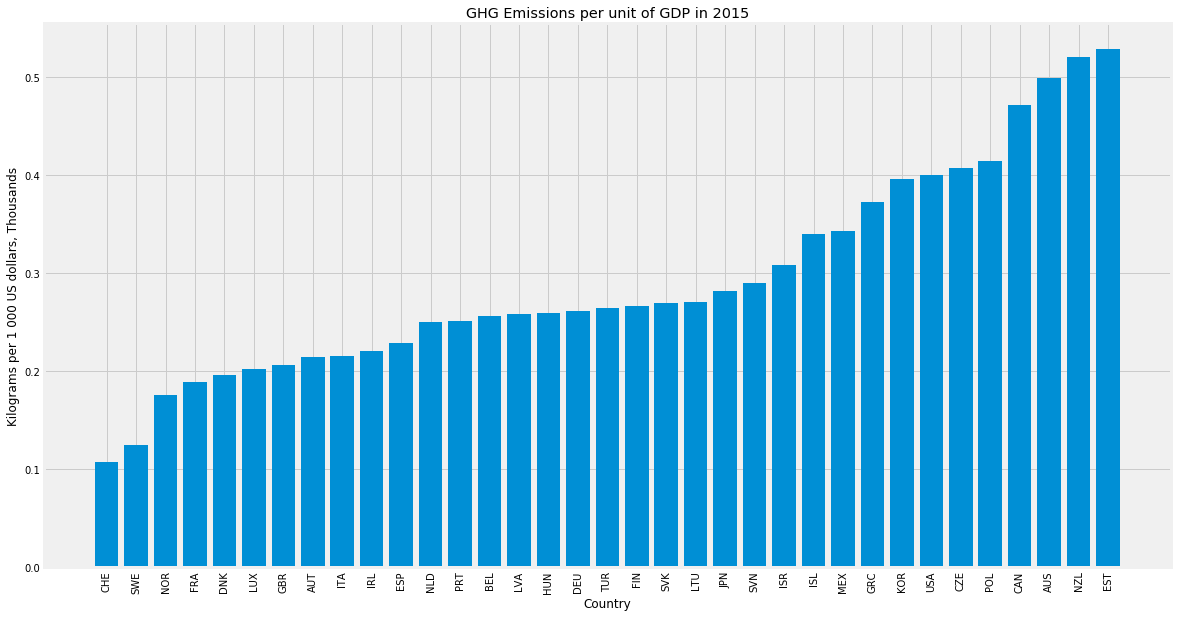

In [16]:
bar_graph(oecd_ghg_gdp, oecd_cc, 2015, 'GHG Emissions per unit of GDP in 2015', 'Kilograms per 1 000 US dollars, Thousands')

Again, this changes our perspective on emissions. While countries such as the US, Canada, and Australia emit a lot of GHG regardless of which metric we look at, this is not true for the UK While the United Kingdom still produces a lot of GHG, when you compare their emissions in per-capita, and per-unit of GDP, they are more green than most countries in the OECD. 

Next, lets see how the OECD's emissions have changed since the year 2000. What this dataset does is set a country's emissions in 2000 to 100, and then compares emissions to this year. But we want to clearly see which countries have increased, or decreased their emissions. To do this, we want to change the base year from being equal to 100, to being equal to zero. We transform and graph this data in the next cell.

In [21]:
oecd_ghg_2000.head()

COU,ARG,AUS,AUT,BEL,BRA,CAN,CHE,CHL,COL,CZE,...,OECD,OECDE,POL,PRT,RUS,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
1990,78.571,86.561,97.835,97.910,75.738,82.450,101.918,68.219,79.315,132.532,...,92.362,104.625,119.937,71.955,166.039,149.242,97.654,104.175,71.795,88.069
1991,82.200,86.806,102.566,99.736,78.257,81.403,105.530,66.042,NaN,119.981,...,92.142,104.275,116.906,74.113,156.683,129.904,90.845,104.436,74.532,87.295
1992,83.523,87.797,94.236,99.476,79.511,83.763,105.080,68.520,NaN,115.557,...,92.308,101.467,113.568,79.378,131.840,118.832,91.362,103.638,76.560,88.821
1993,85.463,87.831,94.310,98.791,81.200,83.915,100.020,72.077,NaN,110.281,...,92.690,99.932,113.462,77.763,123.328,111.820,92.267,104.060,79.508,90.332
1994,86.904,87.862,94.979,101.881,83.671,86.827,98.133,75.805,NaN,105.171,...,93.940,99.432,112.114,78.960,110.190,106.424,94.345,107.524,77.533,91.604


In [22]:
#Create change with 0 as the main horizontal axis
oecd_ghg_2000_0 = oecd_ghg_2000-100

In [23]:
oecd_ghg_2000_0.head()

COU,ARG,AUS,AUT,BEL,BRA,CAN,CHE,CHL,COL,CZE,...,OECD,OECDE,POL,PRT,RUS,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
1990,-21.429,-13.439,-2.165,-2.090,-24.262,-17.550,1.918,-31.781,-20.685,32.532,...,-7.638,4.625,19.937,-28.045,66.039,49.242,-2.346,4.175,-28.205,-11.931
1991,-17.800,-13.194,2.566,-0.264,-21.743,-18.597,5.530,-33.958,NaN,19.981,...,-7.858,4.275,16.906,-25.887,56.683,29.904,-9.155,4.436,-25.468,-12.705
1992,-16.477,-12.203,-5.764,-0.524,-20.489,-16.237,5.080,-31.480,NaN,15.557,...,-7.692,1.467,13.568,-20.622,31.840,18.832,-8.638,3.638,-23.440,-11.179
1993,-14.537,-12.169,-5.690,-1.209,-18.800,-16.085,0.020,-27.923,NaN,10.281,...,-7.310,-0.068,13.462,-22.237,23.328,11.820,-7.733,4.060,-20.492,-9.668
1994,-13.096,-12.138,-5.021,1.881,-16.329,-13.173,-1.867,-24.195,NaN,5.171,...,-6.060,-0.568,12.114,-21.040,10.190,6.424,-5.655,7.524,-22.467,-8.396


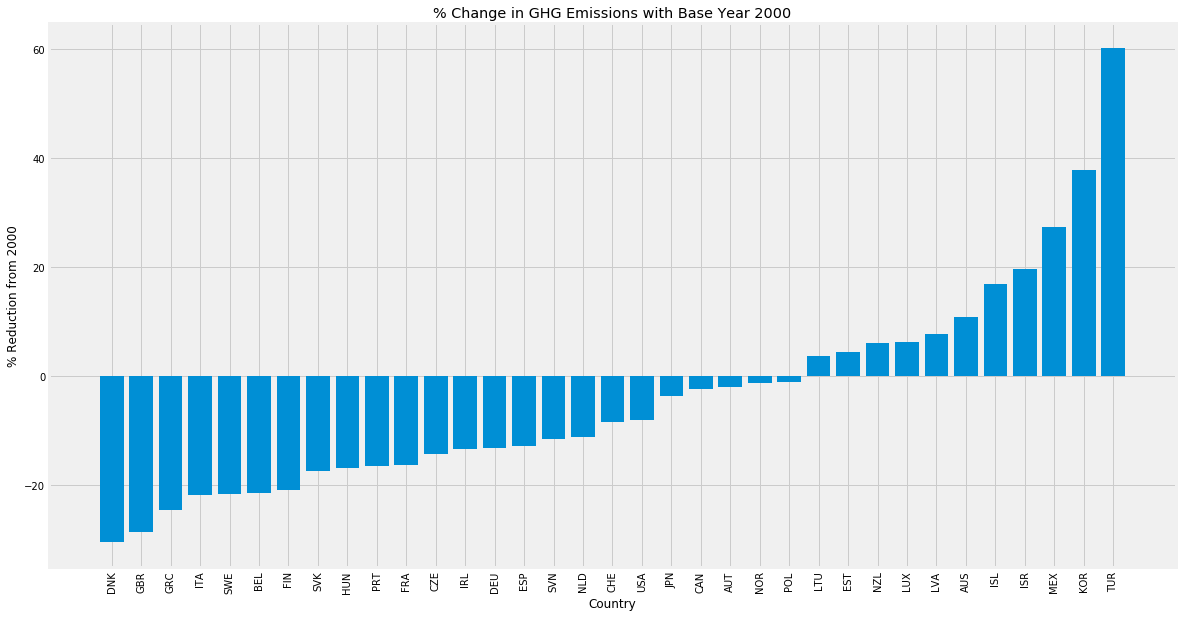

In [24]:
bar_graph(oecd_ghg_2000_0, oecd_cc, 2015, '% Change in GHG Emissions with Base Year 2000', '% Reduction from 2000')

Now we can clearly see which countries have increased, or decreased, their emissions since 2000. Its clear that most industrialized countries in the OECD have reduced emissions since the year 2000 (with some major exceptions such as Australia, and New Zealand), whereas the countries which have increased their emissions are largely still developing. 

Notice that the United Kingdom has reduced its emissions by over 30% since 2000. This is the second largest reduction in the OECD. Lets go into more depth and see where they made reductions in GHG's. 


# GHG Emissions in the United Kingdom

The UK has long been concerned with climate change and its implications. In 2008 the [Climate Change Act](https://www.legislation.gov.uk/ukpga/2008/27/section/1) was announced aiming to reduce the business as usual (BAU) 1990 emissions by 80% in 2050. The achievements of this policy are impressive and set the UK as a leader in environmental policies, in particular (Committee on Climate Change, nd) : 

1. It managed to create a political consensus that allowed for specific budgeting to tackle the climate issues.
2.  By 2017 a 43% reduction in the GHG emissions was achieved, taking into account 1990 as the reference year, **while the economy grew 75% during that period**.  The Act has been successful primarily in the energy sector. 

The UKs incorporation to the Paris Agreement in 2015 is consistent with the Acts objectives and established an international framework,  nevertheless it will need adjustments by year 2020 like the inclusion of net zero emissions targets (LSE, 2018).  With this in mind UK officials have asked advice on how to incorporate the net zero target in order to make a more stringent regulation on GHG emissions and fulfill the Paris commitments (UK gov., 2018). Currently this represents a major challenge to the UK as the political context remains unclear and seems to focus on Brexit rather than international environmental policies. 

### Analysis

First, lets look at how emissions have changed over time for the UK. Before we do this, we have to define a new method for line plot. 

In [58]:
#This method works similarly to our bar_graph method. The only difference is that it doesn't take 'year' as an argument
def line(data, cc, title, x_label):
    plt.figure(figsize=(18,10))
    plt.plot(data[cc])
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel('Year')
    plt.legend(cc, loc="best")
    plt.show()

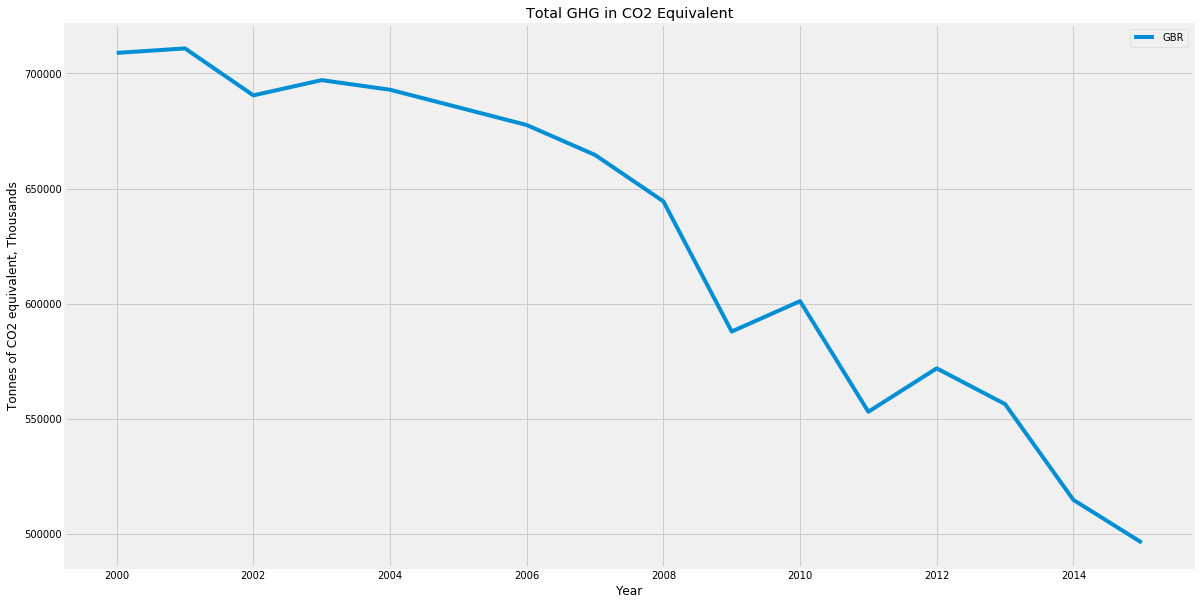

In [60]:
country = ['GBR']
line(oecd_ghg_total.loc[2000:2015], country, 'Total GHG in CO2 Equivalent','Tonnes of CO2 equivalent, Thousands')

The United Kingdom has made clear reductions in the total greenhouse gas emissions. To put this in perspective, lets compare their reductions to the OECD average using a base year of 2000. 

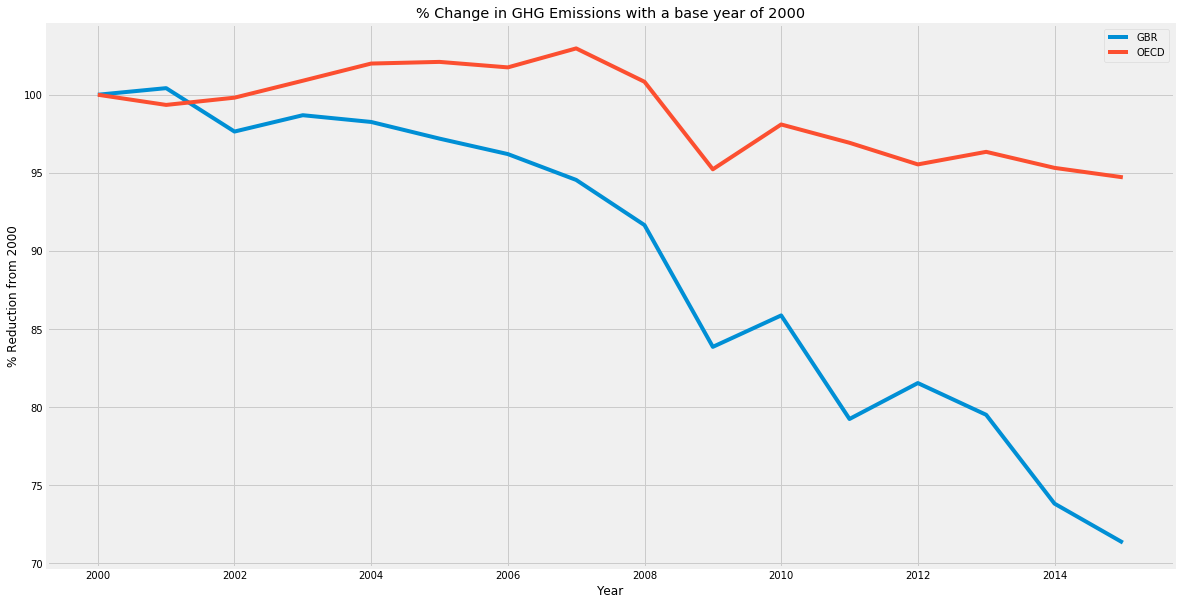

In [61]:
#Define a variable with the countries we want to compare
country_analysis = ['GBR', 'OECD']

line(oecd_ghg_2000.loc[2000:2015], country_analysis, '% Change in GHG Emissions with a base year of 2000', '% Reduction from 2000' )

The United Kingdom is also outperforming the OECD on reducing emissions. Why is this? Perhaps they are investing more in green energy, and therefore can continue to grow their economy while reducing emissions? Or perhaps the United Kingdom has had a decline in population, or total output, and this fall in emission is just reflecting a smaller economy. Lets quickly take a look at their population and GDP figures.

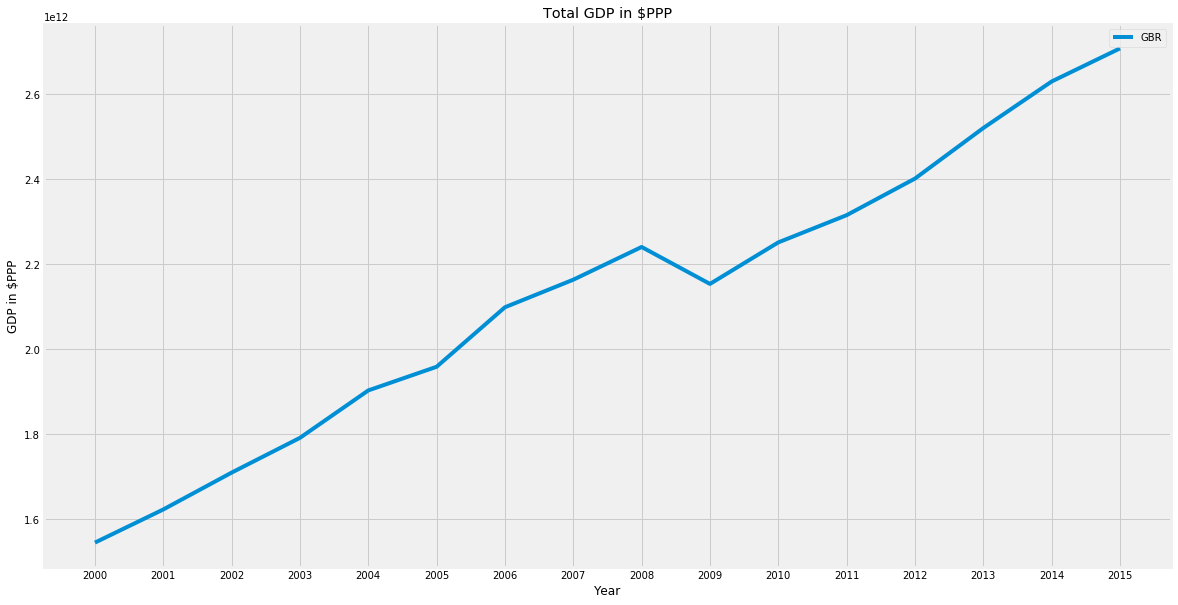

In [65]:
line(wb_tot_gdp[40:56], country, "Total GDP in $PPP", 'GDP in $PPP')

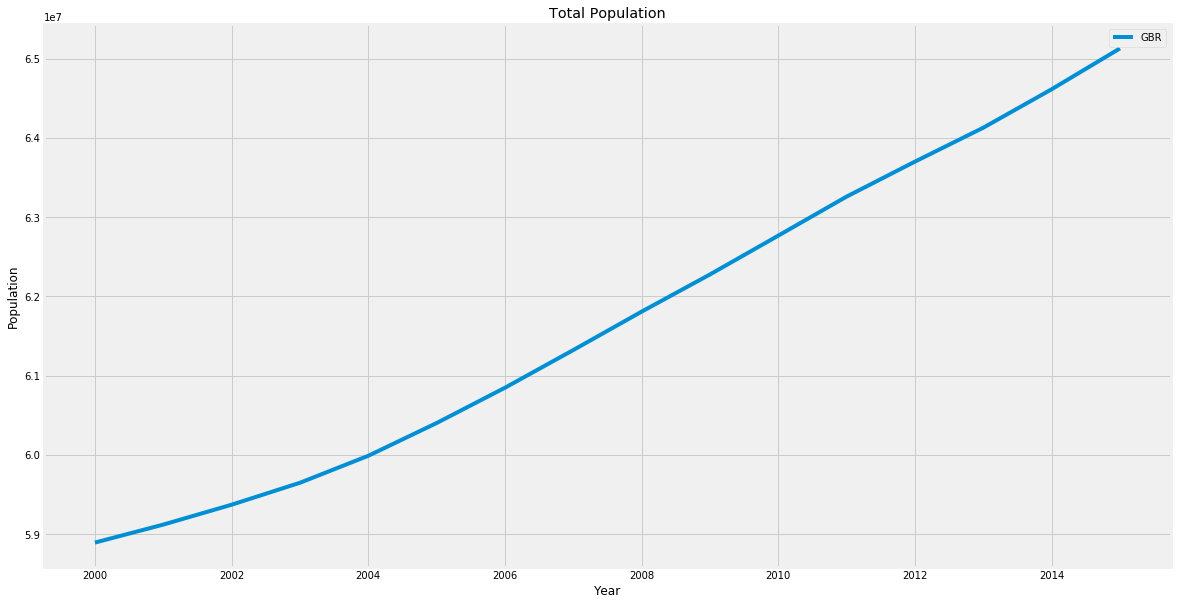

In [66]:
line(tot_pop[32:48], country, 'Total Population', 'Population')

Based on the above two graphs, its clear that the United Kingdoms economy is still growing, and so is their population.  Therefore, their reduction in emissions was not due to a decline in population, or the size of their economy. 

Lets see how the United Kingdom has reduced its emissions. To do this, lets look at the composition of greenhouse gas emissions between 2000 and 2015. To do this, we need a method to create pie charts.

In [67]:
#This method takes in three arugments, the country code, and the two years that we are comparing.  

def pie_emissions(cc, first_year, last_year):
    plt.figure(figsize=(18,10))
    plt.suptitle('Composition of GHG Emissions in 2000 and 2015')
    label = 'Energy', 'Agriculture', 'Industry', 'Waste'
    year = first_year, last_year
    
    for i in range(len(year)):
        economy = oecd_ghg_ener_total[cc].loc[year[i]], oecd_ghg_agri[cc].loc[year[i]], oecd_ghg_indust[cc].loc[year[i]], oecd_ghg_waste[cc].loc[year[i]]
        plt.subplot(1,2,i+1)
        plt.title(cc)
        plt.pie(economy,autopct='%1.1f%%')
        plt.title(year[i])
        plt.legend(label, loc="best")
        plt.axis('equal')
   
    plt.show()

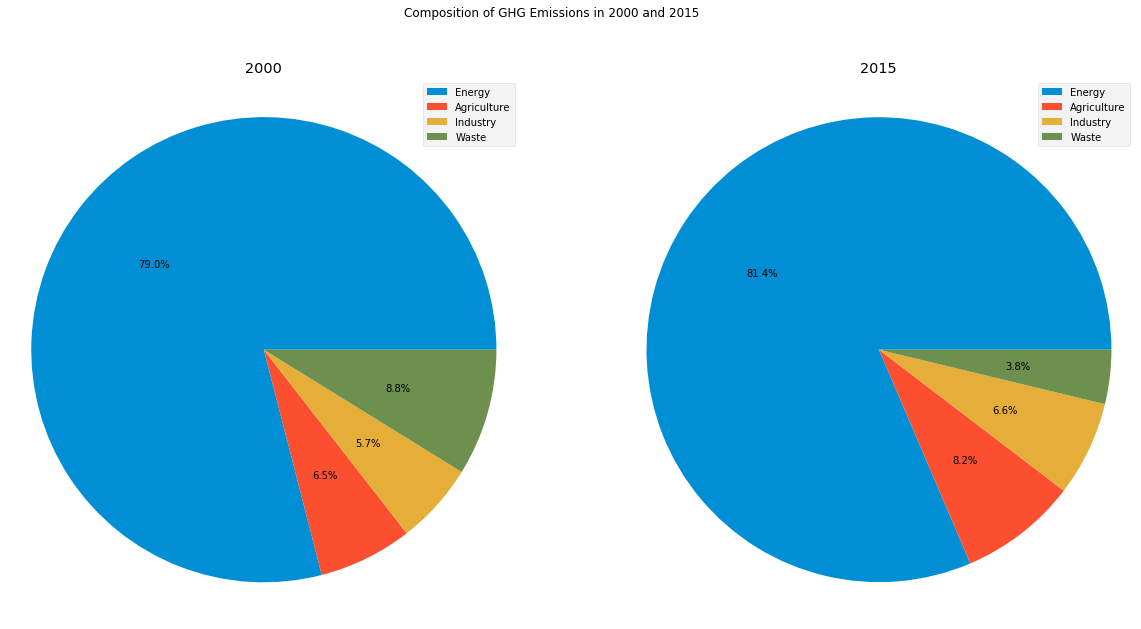

In [68]:
pie_emissions(country,2000, 2015)

From this its clear that the majority of the UK's greenhouse gas emissions come from the Energy industry. There is not a lot of change in the composition of emissions between 2000, and 2015, with the exception of Waste, which made up 8.8% of emissions in 2000, but only 3.8% in 2015. 

Next lets take a look at how energy emissions are distributed within the energy industry. 

In [69]:
#This method works the same way as the previous 'pie_emissions' method. 
#The only difference is that it graphs the composition of emissions from within the energy industry

def pie_energy_one(cc, first_year, last_year):
    
    plt.figure(figsize=(18,10)) 
    label = 'Energy Industries', 'Manufacturing/Construction', 'Transport', 'Other', 'Energy Other', 'Emissions from Fuels'
    year = first_year, last_year
    plt.suptitle('Composition of GHG Emissions from Energy in 2000 and 2015')
    
    
    for i in range(len(year)):
        energy_emissions = oecd_energy_1A1[cc].loc[year[i]], oecd_energy_1A2[cc].loc[year[i]],\
        oecd_energy_1A3[cc].loc[year[i]], oecd_energy_1A4[cc].loc[year[i]], oecd_energy_1A5[cc].loc[year[i]], \
        oecd_energy_1B[cc].loc[year[i]]
        plt.subplot(1,2,i+1)
        plt.pie(energy_emissions, autopct='%1.1f%%')
        plt.title(year[i])
        plt.legend(label, loc="best")
        plt.axis('equal')
    plt.show()

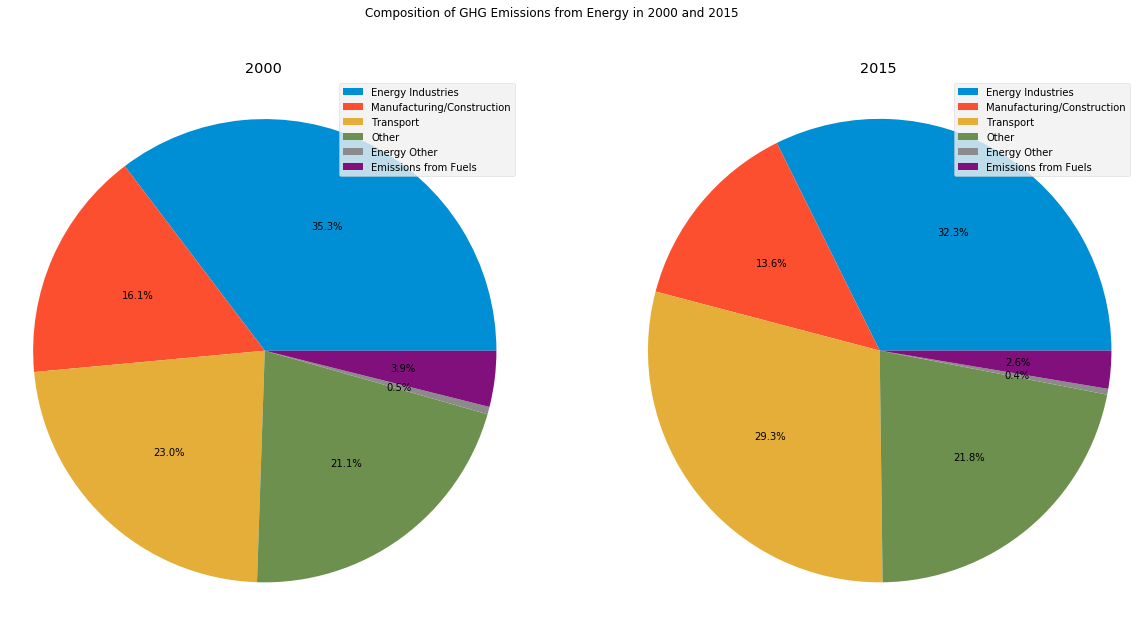

In [70]:
pie_energy_one(country, 2000, 2015)

It looks like there has been a shift in the composition of emissions from energy production related to the Manufacturing and Energy Industries to emissions related to Transportation.

While its important to see how the composition in emissions has changed, lets see how the amount of emissions has changed for each of these sectors.

In [71]:
#These two functions graph the composition of emissions (both total, and energy), over time. 
def comp_emmissions_line(cc, first_year, last_year):
   
    plt.figure(figsize=(18,10))
    label = 'Energy', 'Agriculture', 'Industry', 'Waste'
    plt.suptitle('Composition of GHG Emissions from 2000 to 2015')
    
    plt.plot(oecd_ghg_ener_total[cc].loc[first_year:last_year])
    plt.plot(oecd_ghg_agri[cc].loc[first_year:last_year])
    plt.plot(oecd_ghg_indust[cc].loc[first_year:last_year])
    plt.plot(oecd_ghg_waste[cc].loc[first_year:last_year])
    plt.legend(label, loc="best")
    plt.ylabel('Tonnes of CO2 equivalent, Thousands')
    plt.xlabel('Year')
    plt.axis()
    plt.show()
    
def comp_energy_line(cc, first_year, last_year):    
    
    plt.figure(figsize=(18,10))
    label = 'Energy Industries', 'Manufacturing', 'Transport', 'Other', 'Energy Other', 'Emissions from Fuels'
    plt.suptitle('Composition of GHG Emissions from Energy from 2000 to 2015')
    
    
    plt.plot(oecd_energy_1A1[cc].loc[first_year:last_year])
    plt.plot(oecd_energy_1A2[cc].loc[first_year:last_year])
    plt.plot(oecd_energy_1A3[cc].loc[first_year:last_year])
    plt.plot(oecd_energy_1A4[cc].loc[first_year:last_year])
    plt.plot(oecd_energy_1A5[cc].loc[first_year:last_year])
    plt.plot(oecd_energy_1B[cc].loc[first_year:last_year])
    
    plt.legend(label, loc="best")
    plt.ylabel('Tonnes of CO2 equivalent, Thousands')
    plt.xlabel('Year')
    plt.axis()
    plt.show()

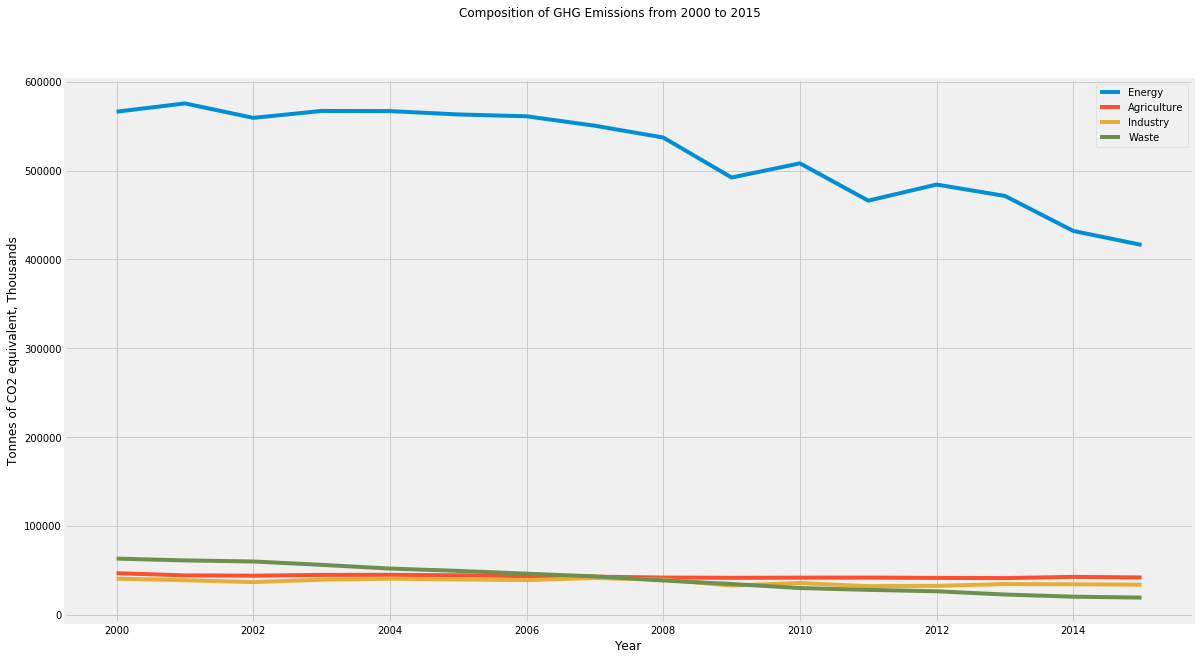

In [72]:
comp_emmissions_line(country, 2000, 2015)

From this graph its clear that the main reductions in the UK's GHG emissions comes from changes in the Energy production, and Waste, while Agriculture and Industry stays relatively constant.

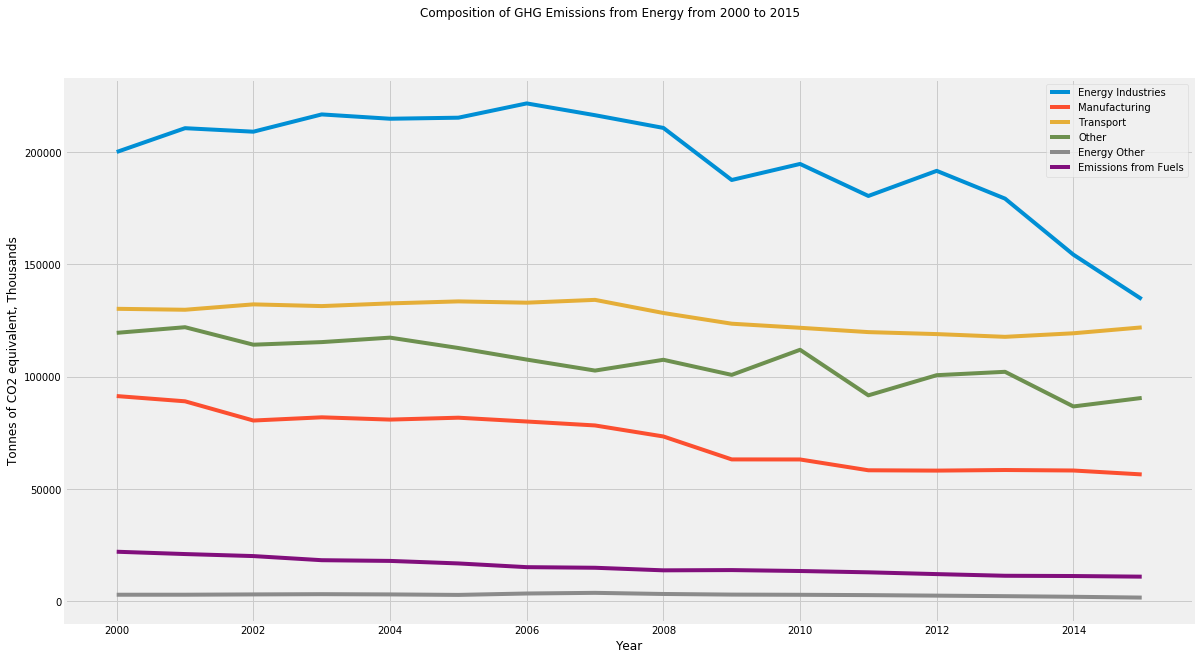

In [73]:
comp_energy_line(country, 2000, 2015)

When we narrow our analysis to the emissions from Energy, and we see that most components stay relatively stable, or have a small decline, with the exception of the Energy industry which has had a steep decline starting in 2006. 

So it appears that most of the decline in emissions in the United Kingdom comes specifically from Energy production, and Waste. 

Finally, to complete our analysis, lets see how  much land use change has affected their impact on emissions. [Land-use change](https://en.wikipedia.org/wiki/Land_use,_land-use_change,_and_forestry) includes activities such as planting new trees, or cutting down forests and changing that land to industry. Since trees absorb carbon, many countries have negative values for land use, which means that this activity represents a net reduction in carbon emissions, which helps offset their carbon emissions. 

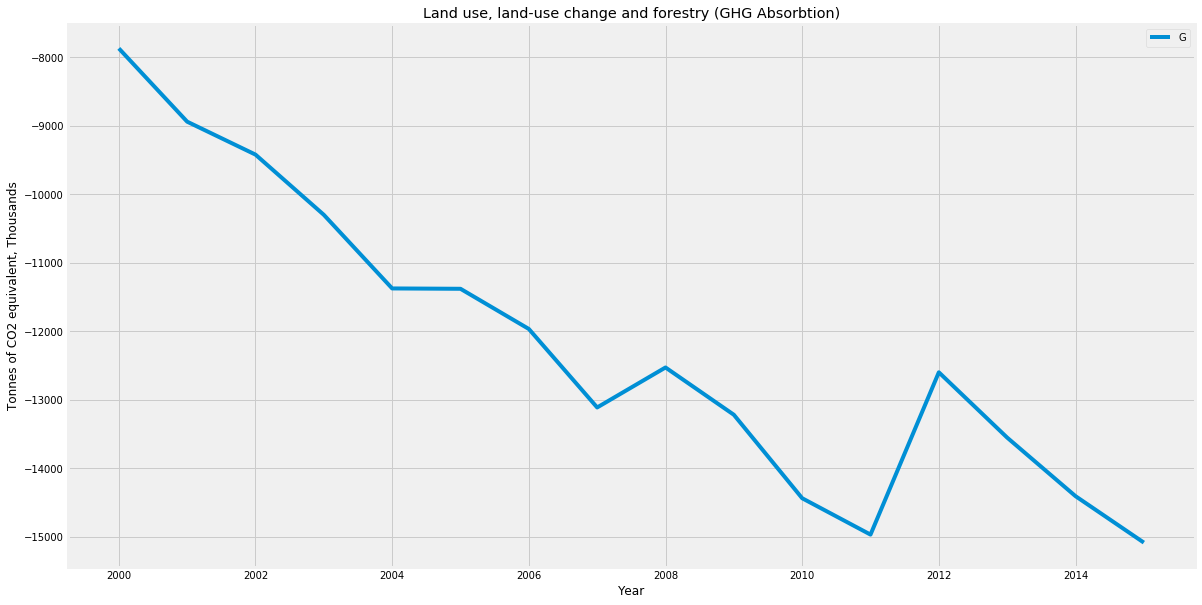

In [74]:
line(oecd_ghg_lu.loc[2000:2015], 'GBR', 'Land use, land-use change and forestry (GHG Absorbtion)', 'Tonnes of CO2 equivalent, Thousands')

Clearly the UK is on the right track when it comes to land-use change, but it represnts only a small part in its emission reduction strategy.

## Secondary Analysis: United States and Mexico

Since we already defined the graphs needed to analyze GHG emissions in the OECD, we thought we would briefly extend our analysis to two other countries that interested us: the United States, and Mexico. Instead of calling each of the these methods again, we create a new method that will automatically print the graphs for any country in the OECD. 

In [75]:
#This combines the graphs we just reviewed into one method. 

def ghg_analysis(country):
    line(oecd_ghg_total.loc[2000:2015], country, 'Total GHG in CO2 Equivalent','Tonnes of CO2 equivalent, Thousands')
    country_analysis = [country, 'OECD']
    line(oecd_ghg_2000.loc[2000:2015], country_analysis, '% Change in GHG Emissions with a base year of 2000', '% Reduction from 2000' )
    line(wb_tot_gdp[40:56], country, "Total GDP in $PPP", 'GDP in $PPP')
    line(tot_pop[32:48], country, 'Total Population', 'Population')
    pie_emissions(country,2000, 2015)
    pie_energy_one(country, 2000, 2015)
    comp_emmissions_line(country, 2000, 2015)
    comp_energy_line(country, 2000, 2015)
    line(oecd_ghg_lu.loc[2000:2015], country, 'Land use, land-use change and forestry (GHG Absorbtion)', 'Tonnes of CO2 equivalent, Thousands')

### GHG Emissions in the United States of America

The past administration led by Barack Obama acknowledged climate change as the greatest challenge for future generations (UNFCC,2015). Back then environmental policies like the Climate Action Plan, aimed to enforce the carbon diet, the development of fuel efficiency standards, waste reduction, and forest and landscape protection, among others (The Washington Post, 2013). As expected, by 2015 the USA signed the Paris Agreement setting its NDC targets and committing to the global challenge. 

Sadly the current USA administration announced in 2017 its withdrawal from the Paris Agreement. This decision is extremely controversial as the biggest economy in the world opted out. It is true that regardless of President Trump decision, climate actions are still supported at subnational level, nevertheless there is a feeling of uncertainty regarding the environmental policy worldwide.  Particularly because among the OECD countries the USA is the largest GHG emitter. Although not covered in this article it is worth studying the probably higher cost of GHG reduction shared by all countries given the USA will withdrawal from the Paris Agreement. Most importantly do all the other countries in the agreement still have a strong incentive for climate action?  This is relevant because if we assume that this goals are not pursued by Trump`s administration (using a BAU scenario), it will translate into costs for other countries. Further work has to be done regarding this topic.  

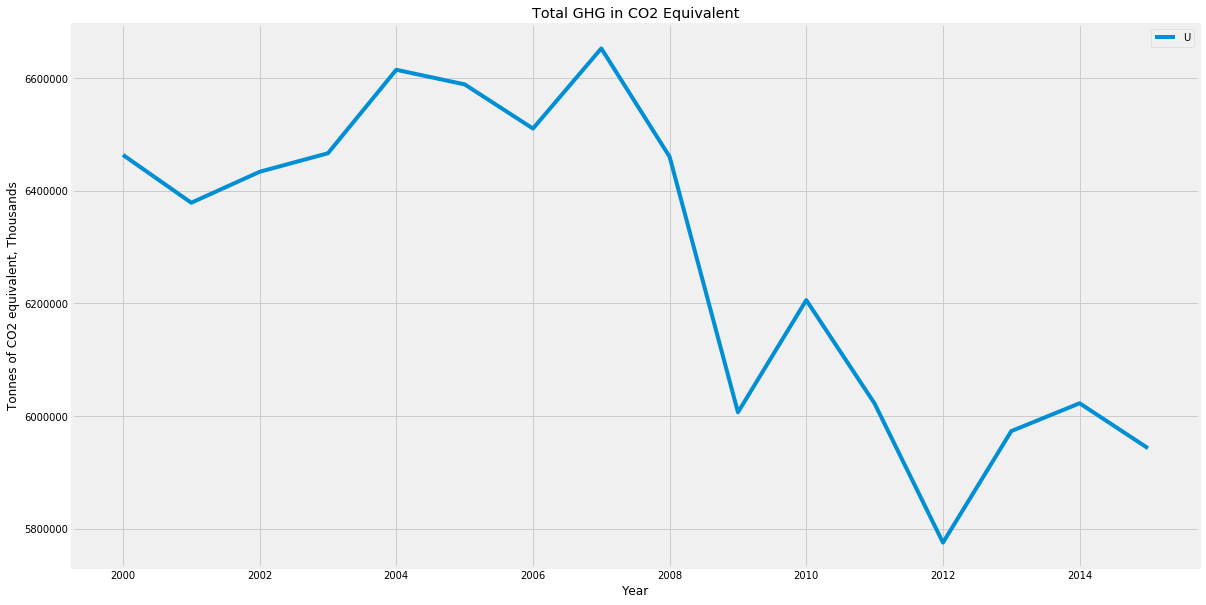

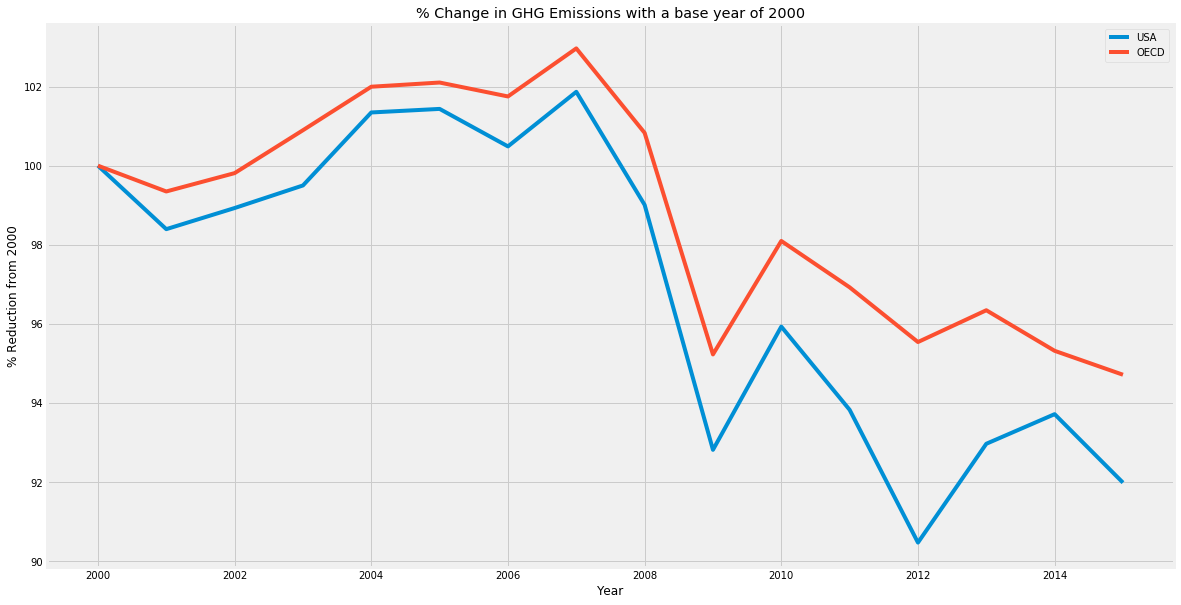

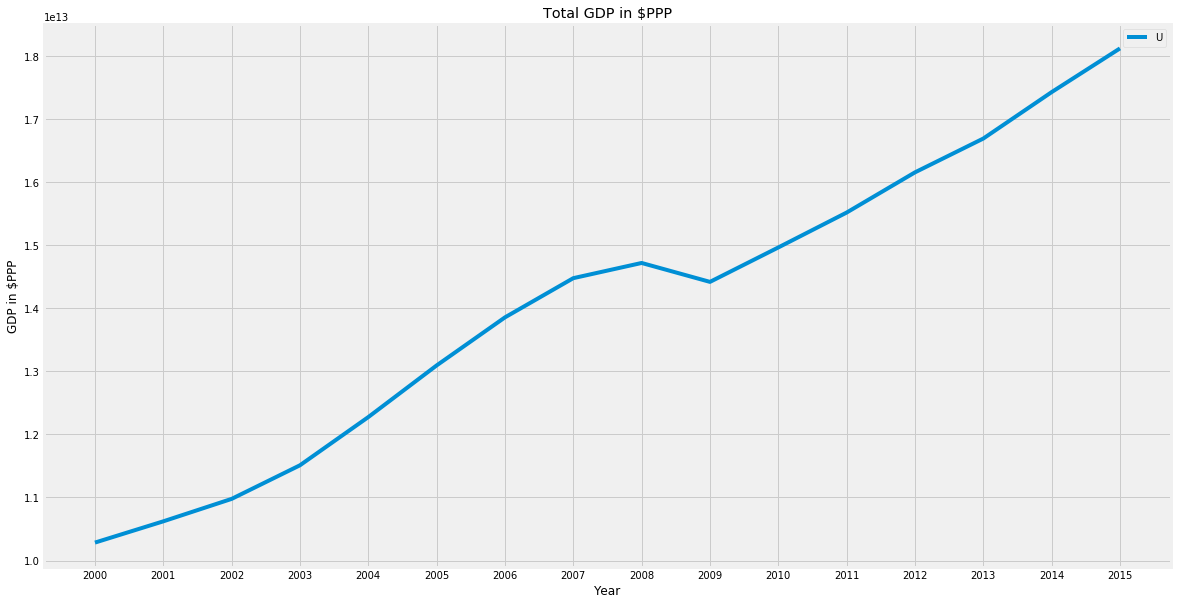

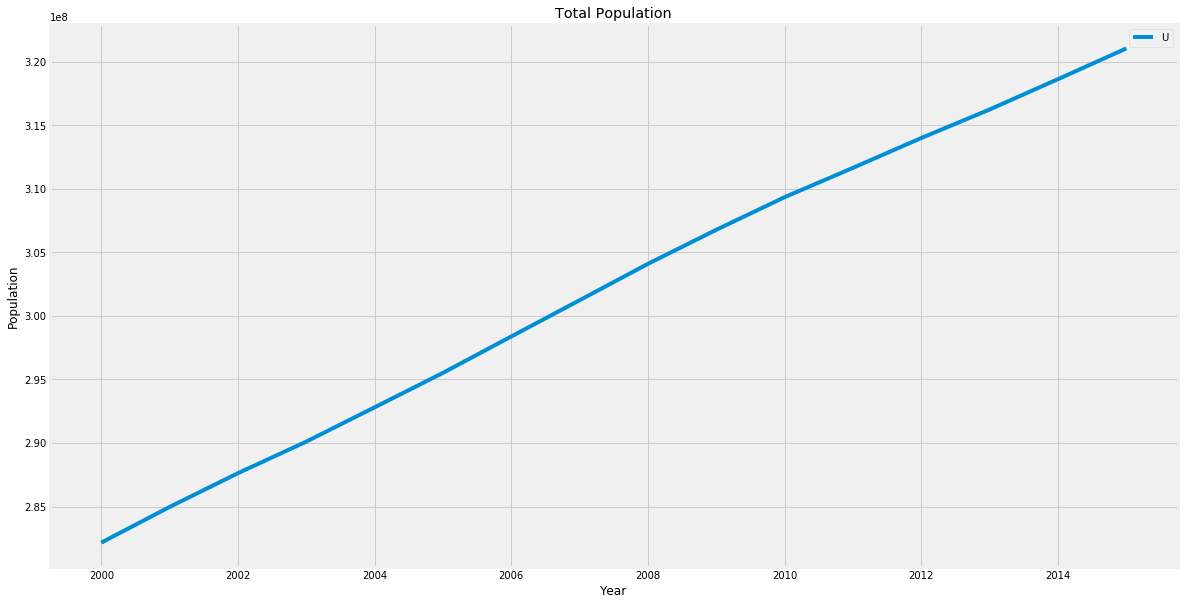

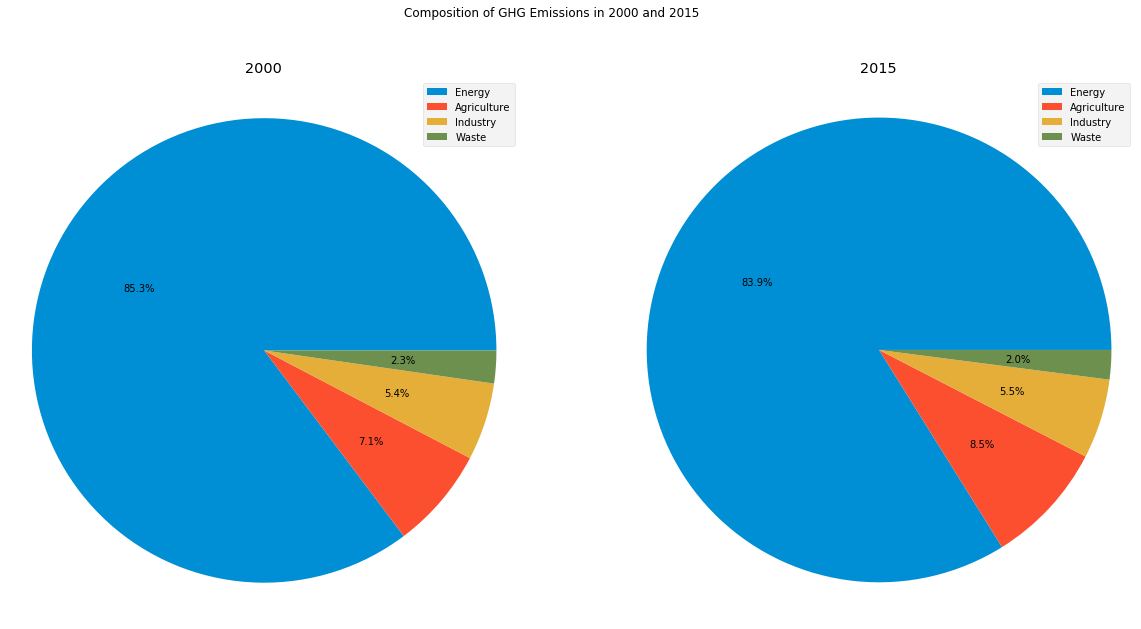

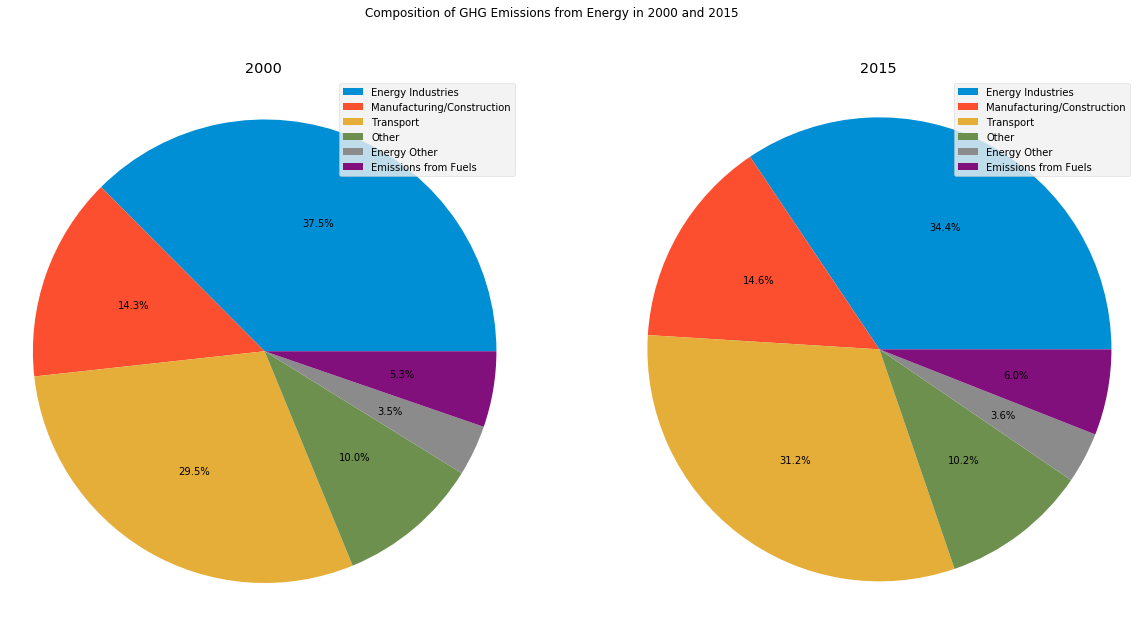

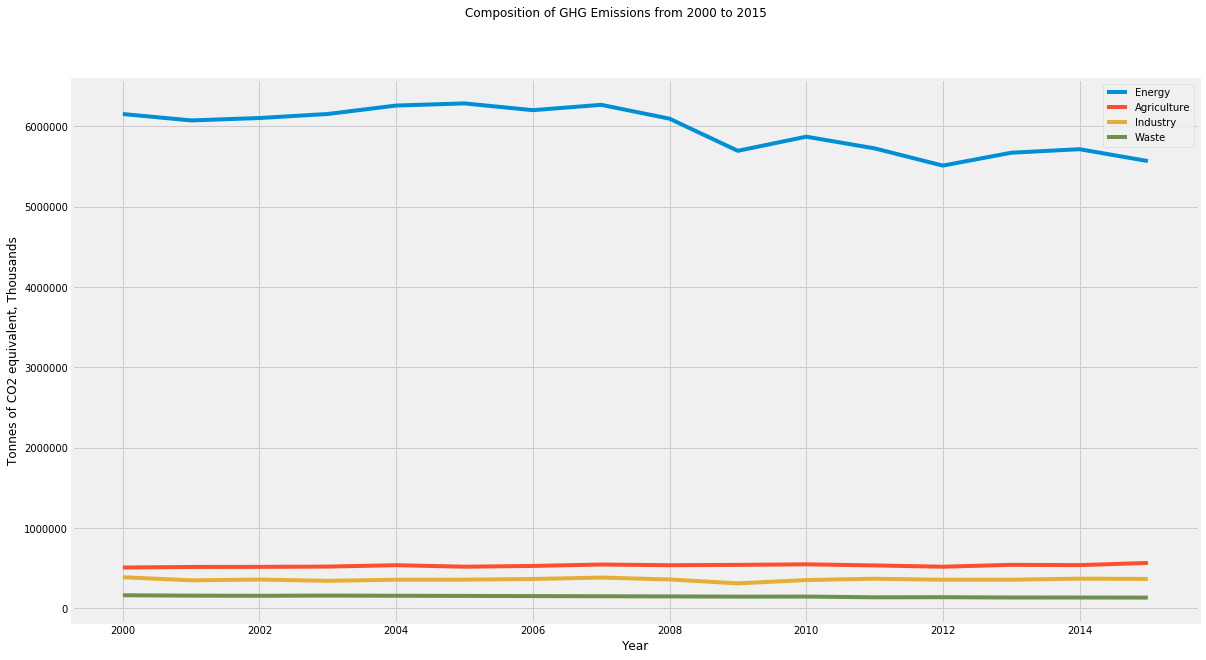

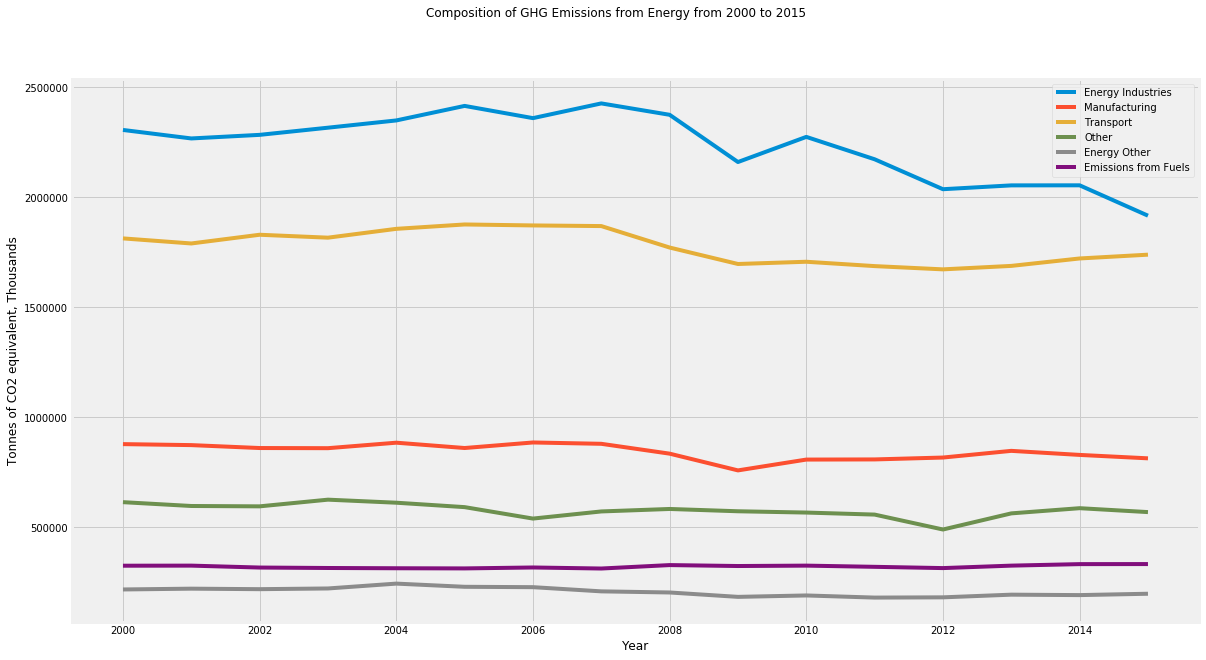

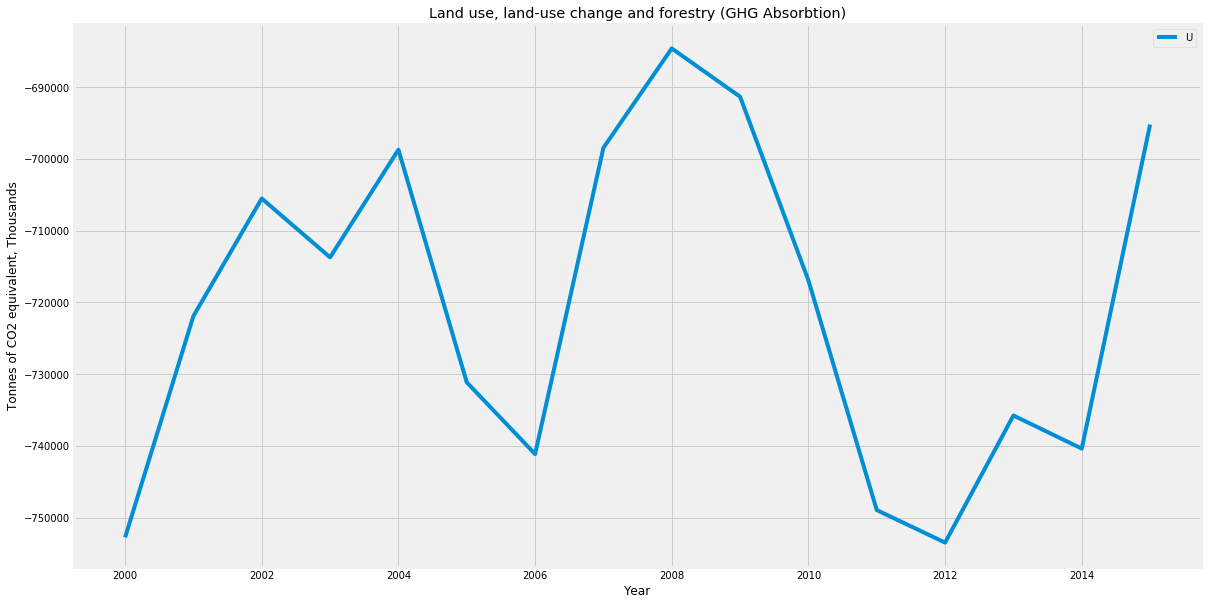

In [82]:
ghg_analysis('USA')

### GHG Emissions in Mexico 

Mexico has played an important role in the Paris Agreement negotiations as it set ambitious commitments for the global temperature reduction target . Although Mexico is labelled as an underdeveloped country, its emissions represent approximately 1.3% of the total worldwide (SEMARNAT, 2018). The country has taken action by the creation of legal frameworks to reduce climate change and CO2 emissions.   The past decades have been characterized by the dependence on fossil fuels so in 2013 a major energetic reform was enacted. This reform aimed to make more efficient the energetic sector by fostering economic competition and set as goal a 35% clean energy generation by 2024 and 50% by 2050 (SEMARNAT, 2018). 

Analyzing this country is interesting given that Mexico is particularly vulnerable to climate change given its geographic location, topography, and its social and economic characteristics.  Furthermore it can become a global leader in Climate Change Action. 

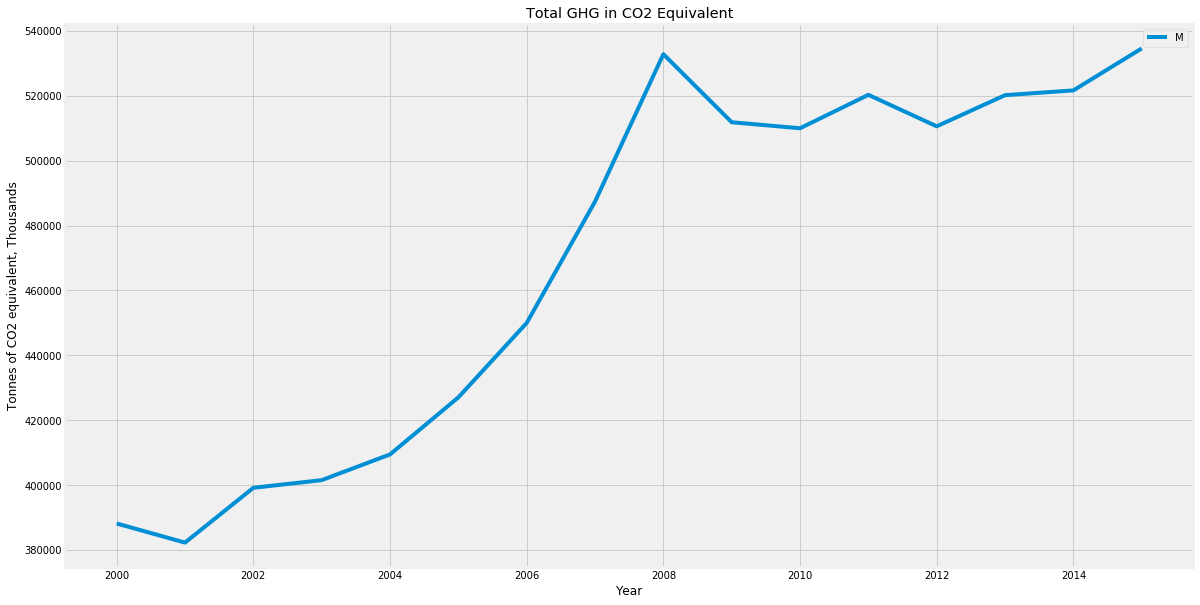

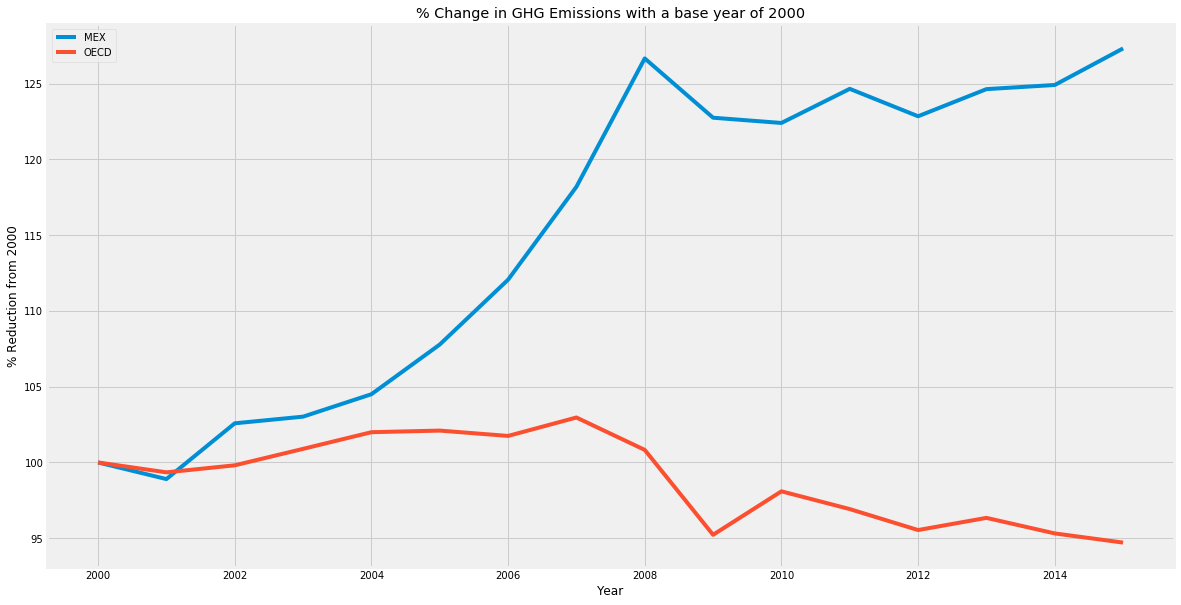

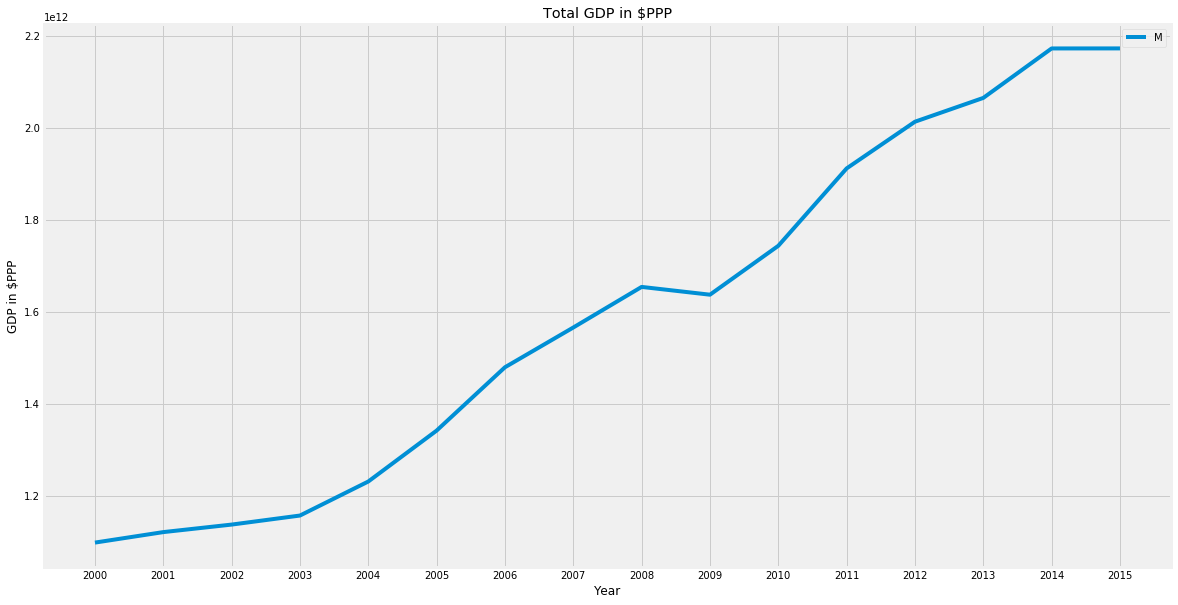

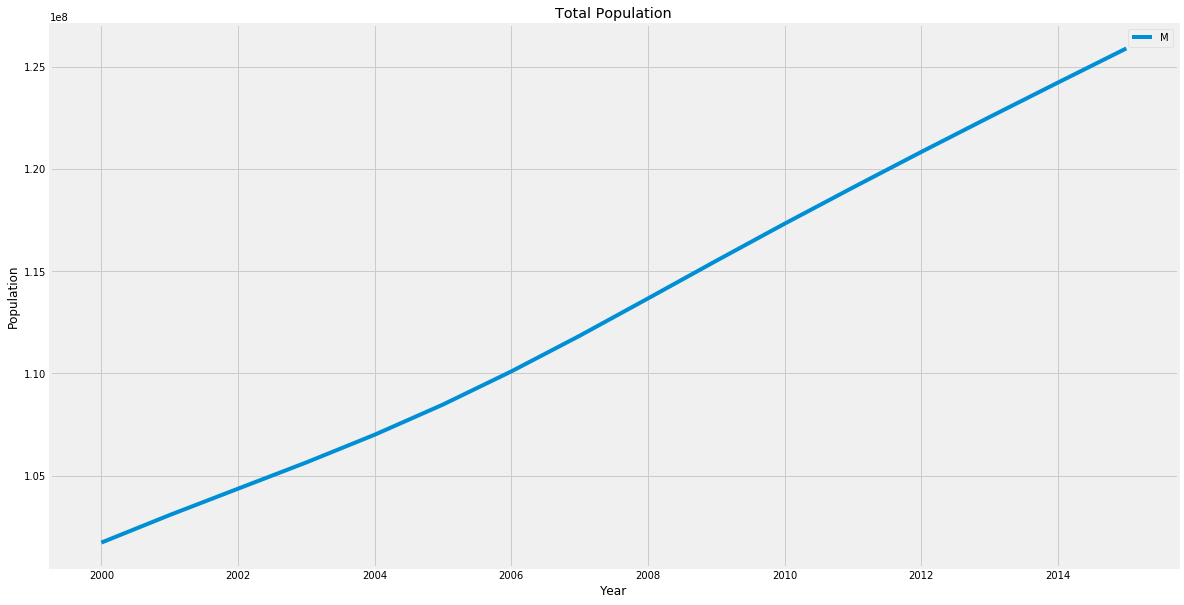

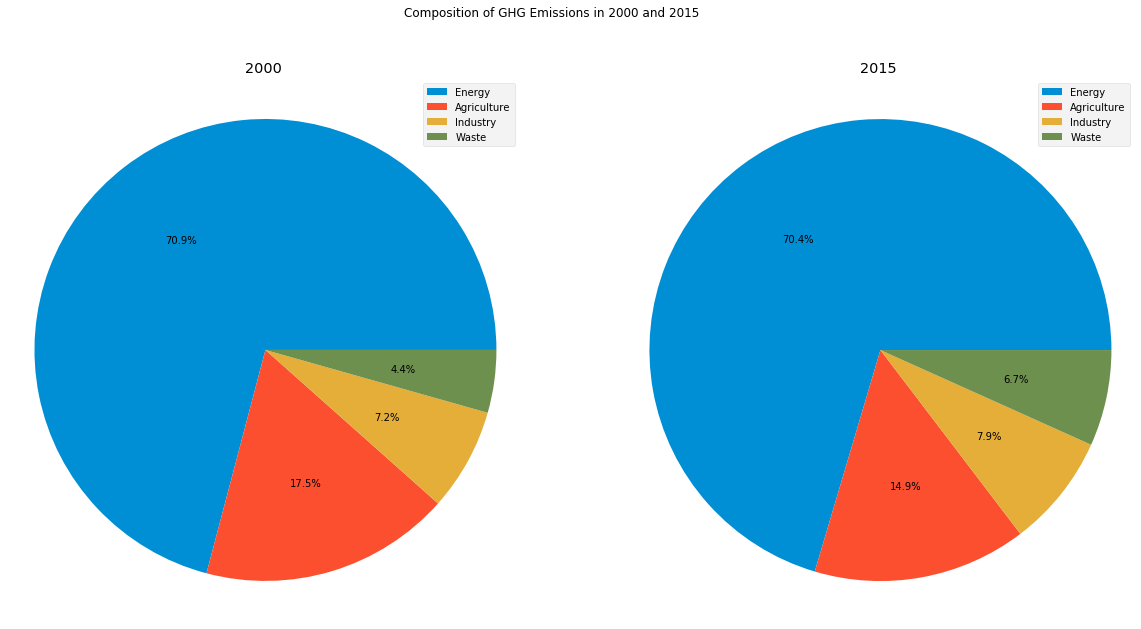

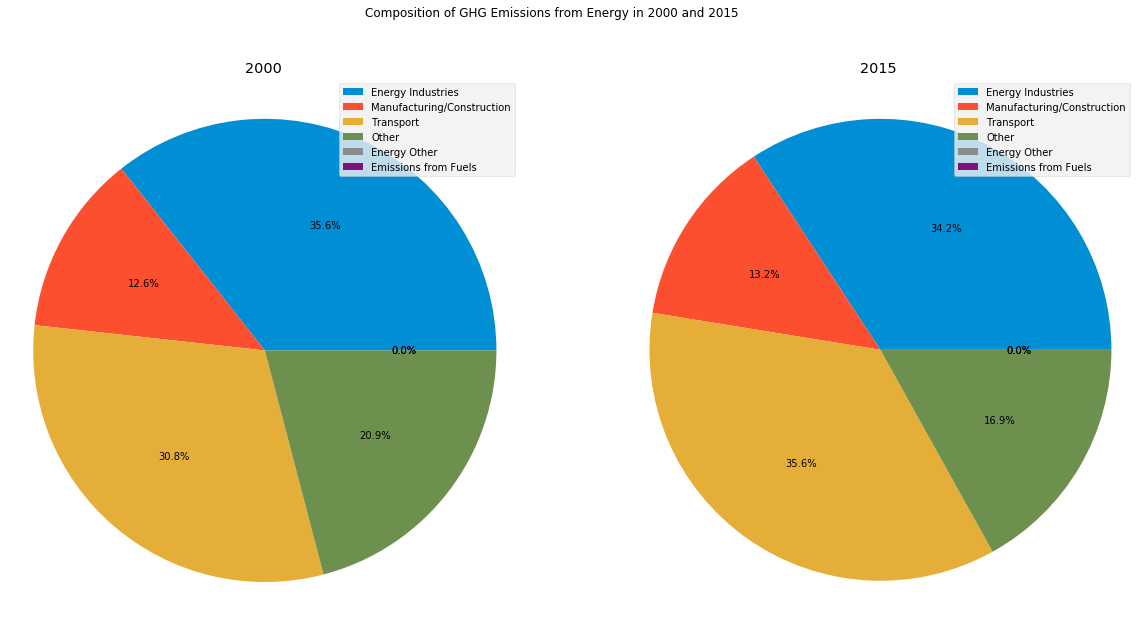

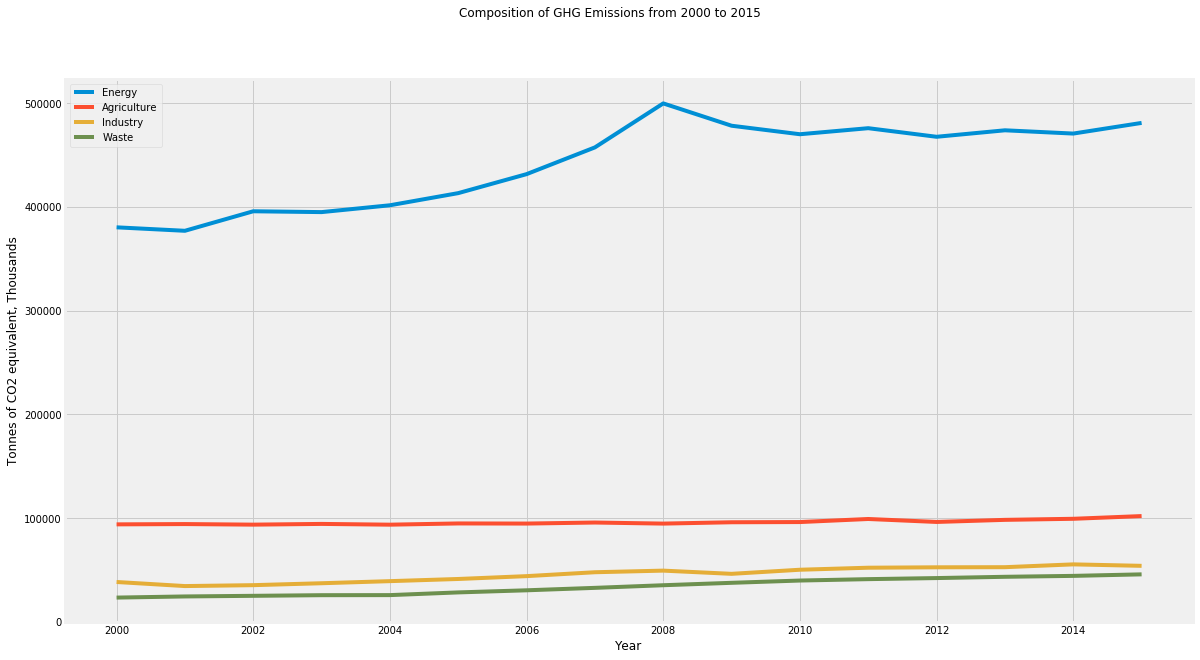

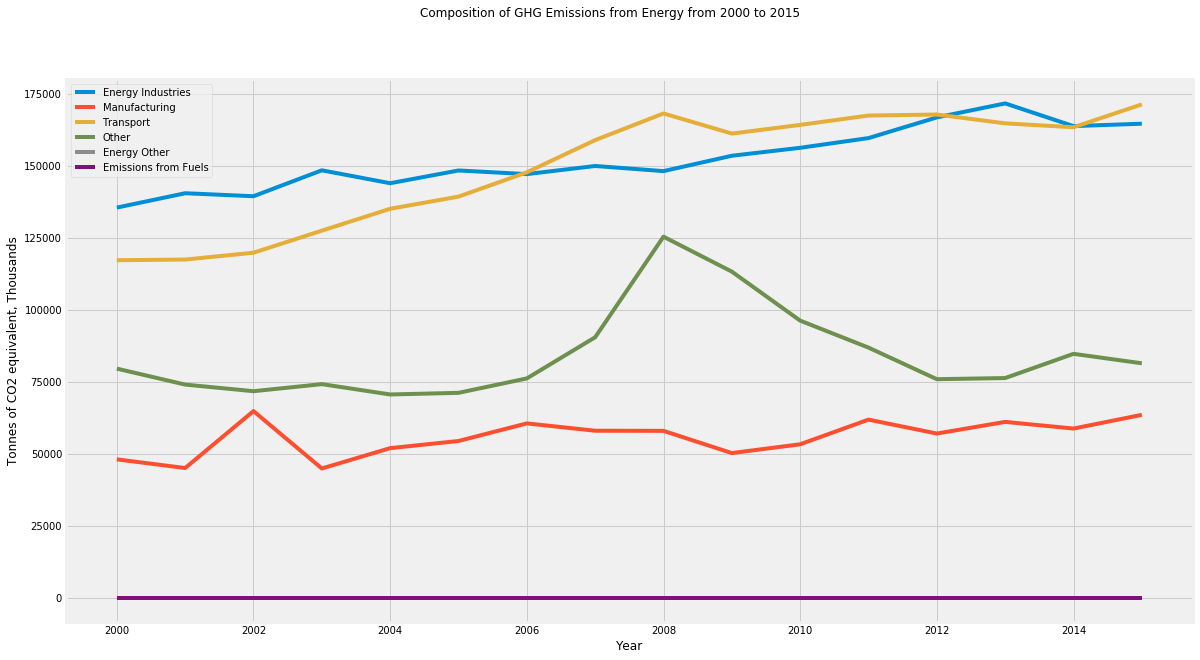

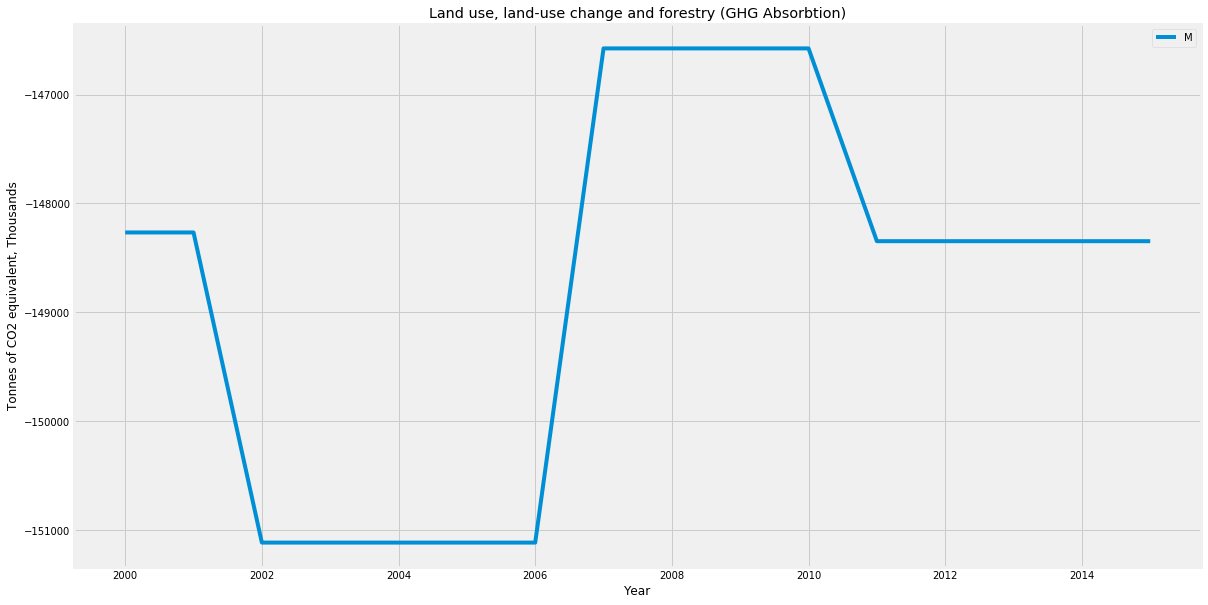

In [81]:
ghg_analysis('MEX')

# ARIMA Projection of GHG Emissions in the UK

To do a projection of GHG emissions in the UK we follow the method used in [Prananda, et al.](https://knepublishing.com/index.php/KnE-Energy/article/view/364/1259) and the work from [Reza, et al.](https://www.researchgate.net/profile/Mohammad_Lotfalipour/publication/261882427_Prediction_of_CO2_emissions_in_Iran_using_grey_and_ARIMA_models/links/00463535dfb010b245000000/Prediction-of-CO2-emissions-in-Iran-using-grey-and-ARIMA-models.pdf) They developed an ARIMA model to predict the GHG emissions in the Surabaya municipality in Indonesia and in Iran, respectively.  We followed the [Box-Jenkins methodology](https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method) that very briefly is explained in the following 3 steps: 

1. **Identification of the model:** First we plot our time series and run a Dickey Fuller test to determine whether the series is stationary. If it is not then we transform it by differencing it. We also made an autocorrelation plot to help determine the lag of the model. 

2. **Parameter estimation:** our model is coded such that it finds the best fit for the parameters of the ARIMA model by running all possible combinations. 

3. **Model check: **We plotted the residual errors to evaluate the temporal structure uncaptured by the model. 

We are aware that this is the first version of the model therefore further work has to be done to fully automate the process, by for instance differentiating the time series up until the Dickey Fuller test determines that it is stationary (using a for loop).

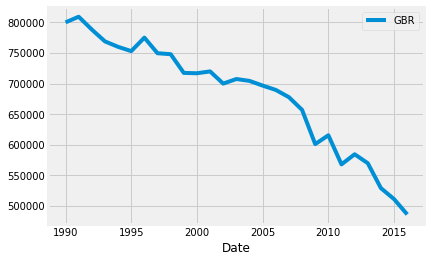

In [85]:
#Country Definition and time series plot 
country = 'GBR'

#First we have to ensure that we are working with a proper datetime index
#This converts our YEAR column into datetime format
forecast_series = pd.DataFrame(oecd_ghg_total_ex[country])
forecast_series = forecast_series.reset_index()
forecast_series['Month'] = 1   
forecast_series['Day'] = 1   
forecast_series['Date']=pd.to_datetime((forecast_series.Year*10000+forecast_series.Month*100+forecast_series.Day).apply(str),format='%Y%m%d')
forecast_series=forecast_series.set_index('Date')
#To make sure it is a datetime object we can run the next line: series.dtypes

#Drop the extra columns
drop_columns = ['Year', 'Month', 'Day']
forecast_series = forecast_series.drop(drop_columns, axis=1)

#Plot the time series
forecast_series.plot()
plt.show()

Next we need to check whether it is stationary by using an Augmented Dickey Fuller test. 

In [86]:
#STATIONARITY CHECK: Augmented Dickey Fuller statistical test to see if the series is stationary

#Turn the dataframe into a series
dicky_fuller_test_data = forecast_series[country]

result = adfuller(dicky_fuller_test_data )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.648007
p-value: 0.997995
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


Since the p-value of the ADF test reports a value that is greater than 0.05, we can conclude that our data is not stationary. This means that we have to difference the data (at least once) and run the ADF test again. 

In [87]:
#Transform the series to a stationary one

# Define a method to difference the dataset
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

differenced_data = difference(dicky_fuller_test_data)

#Undifference the data
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

#Convert 'differenced_data' to a float
differenced_data=np.array(differenced_data,dtype=float)

#Performing again a Dickey Fuller Test on the new series generated 
result = adfuller(differenced_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.194622
p-value: 0.000000
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633


Since the p-value of the ADF test reports a value greater than 0.05, we can conclude that our data is stationary, and we can proceed with the projection.  

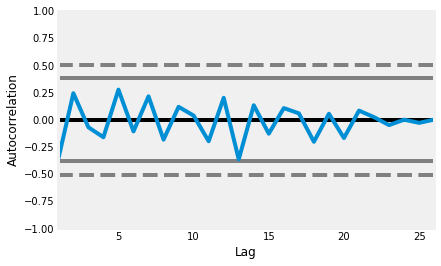

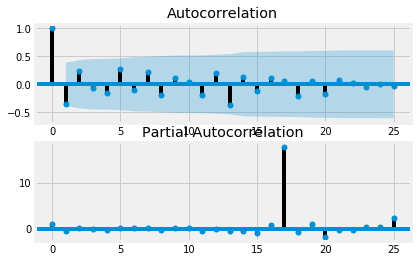

In [88]:
#Following Box-Jenkins method we make an autocorrelation and partial autocorrelation plot to support the correct ARIMA model estimation

autocorrelation_plot(differenced_data)
plt.show()

plt.figure()
plt.subplot(211)
plot_acf(differenced_data, ax=plt.gca())
plt.subplot(212)
plot_pacf(differenced_data, ax=plt.gca())
plt.show()

Since we are following the Box-Jenkins method, we included the previous auto-correlation charts. We are not expert in time-series forecasting with ARIMA, so rather than attempt to interept these charts and choose the most appropriate parameters, we wrote a function that will evaluate each possible combination of ARIMA parameters, and choose the one that minimizes the mean squared error. The advantage to this method is that we are not relying on our limited knowledge of the ARIMA method to specify the most appropriate model. The disadvantage is that we can only justify the model selection based on the fact that it has the lowest means square error.

In [89]:
#Definition of functions to find the best ARIMA model to work from.
#We divide our data into training data and test data
def evaluate_arima_model(differenced_data, arima_order):
    # prepare training dataset
    train_size = int(len(differenced_data) * 0.66)
    train, test = differenced_data[0:train_size], differenced_data[train_size:]
    history = [x for x in train]
    
#Predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # Calculation of out of sample error
    error = mean_squared_error(test, predictions)
    return error

#Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg

In [90]:
#Parameter Evaluation

#Next we specify the possible p, d, and q values. 
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

#Ignore warnings
warnings.filterwarnings("ignore")

#Next we run the test, and save the selected model to the following variable
arima_values = evaluate_models(differenced_data, p_values, d_values, q_values)

Best ARIMA(1, 0, 0) MSE=680153323.305


Based on this method, the best ARIMA model to use is the (1, 0, 0) model. Or in other words, this is the model that best minimizes the mean square error. 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   26
Model:                     ARMA(1, 0)   Log Likelihood                -290.805
Method:                       css-mle   S.D. of innovations          17378.429
Date:                Wed, 30 Jan 2019   AIC                            587.610
Time:                        15:50:11   BIC                            591.384
Sample:                             0   HQIC                           588.697
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.216e+04   2508.316     -4.847      0.000   -1.71e+04   -7241.797
ar.L1.y       -0.3733      0.183     -2.035      0.053      -0.733      -0.014
                                    Roots           

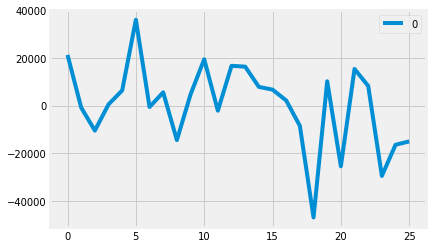

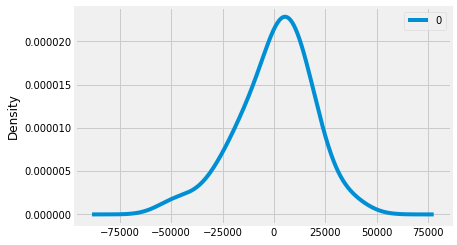

                  0
count     26.000000
mean     314.476437
std    17791.167930
min   -46915.221576
25%    -9955.325671
50%     3450.350676
75%     9763.329609
max    36102.847237
Test MSE: 680428809.390


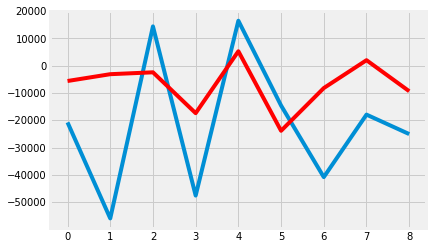

In [91]:
#Model fitting 
model = ARIMA(differenced_data, order=arima_values)
model_fit = model.fit(disp=0)
print(model_fit.summary())

#Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

#Plot of Predicted and Test
size = int(len(differenced_data) * 0.66)
train, test = differenced_data[0:size], differenced_data[size:len(differenced_data)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=arima_values)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

#Plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## 2030 Goal: Will the UK meet its goal?

Since the UK was a member of the European Union when the Paris Climate Agreement was signed, their NDC target falls under the umbrella of the European Union. [The EU's NDC target states the following](https://www4.unfccc.int/sites/ndcstaging/PublishedDocuments/United%20Kingdom%20of%20Great%20Britain%20and%20Northern%20Ireland%20First/LV-03-06-EU%20INDC.pdf):

"The EU and its Member States wish to communicate the following INDC. 

The EU and its Member States are committed to a binding target of an at least 40% domestic reduction in greenhouse gas emissions by 2030 compared to 1990, to be fulfilled jointly, as set out in the conclusions by the European Council of October 2014. In line with the Lima Call for Climate Action, in particular its paragraph 14, the following quantifiable information is hereby submitted"

Now we need to turn this NDC target into emissions, and continue with our projection. 

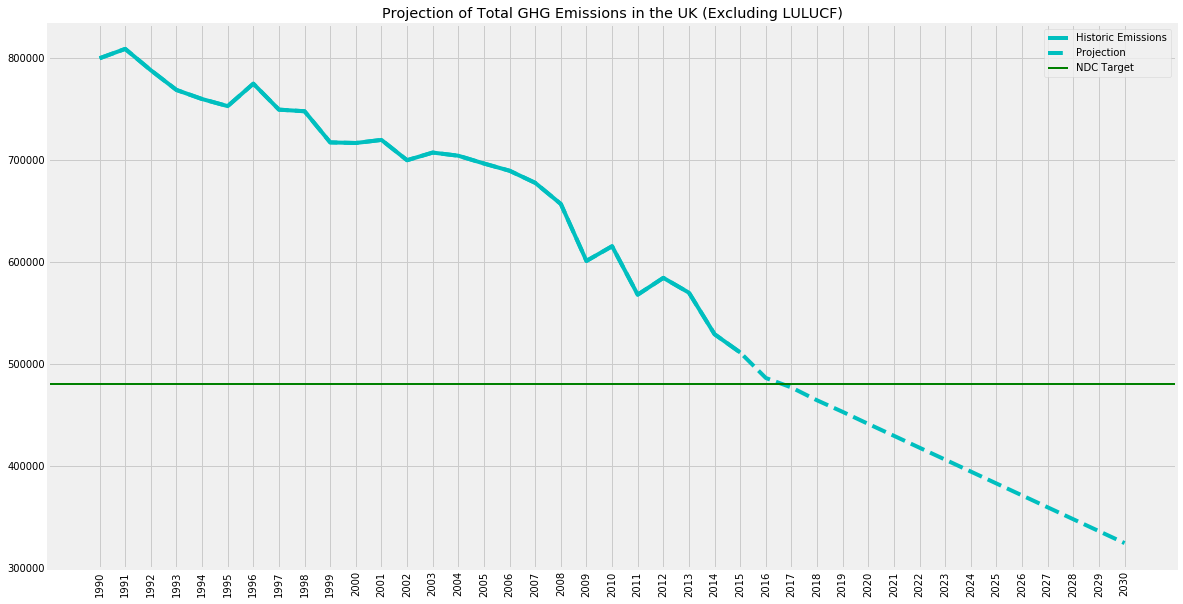

In [92]:
#Define the goal
ndc_goal = -0.40

#Define the projected year
projected_year = 2030

#Determine the amount of emissions the goal implies
ndc_target = oecd_ghg_total_ex['GBR'][1990]*(1.00+ndc_goal)

#Number of years of projection
n=projected_year-2016

forecast = model_fit.forecast(steps=n)[0]

#Turn the dataframe into a series with just the emission values
forecast_values = forecast_series.values.tolist()

#Invert the differenced data
for i in forecast:
    inverted = inverse_difference(forecast_values, i, 1)
    inverted = inverted.tolist()
    forecast_values.append(inverted)

#Creates a list of years for the graph
year = []
for i in range(projected_year -1990+1): 
    year.append(1990+i)
    
#Create a list of realized emission values for the graph.
x = []
for i in range(26):
    x.append(dicky_fuller_test_data[i])

plt.figure(figsize=(18,10))
labels = 'Historic Emissions', 'Projection', 'NDC Target'
plt.plot(x, color = 'c')
plt.plot(forecast_values, color = 'c',linestyle = '--')

plt.axhline(y = ndc_target, linewidth=2, color = 'g')

x_plot = range(len(year))
plt.xticks(x_plot, year)
plt.xticks(rotation=90)

plt.title('Projection of Total GHG Emissions in the UK (Excluding LULUCF)')
plt.legend(labels, loc="best")

plt.show()

Based on this projection, the UK should have already met its NDC target of reducing emissions by 40%. 

## 2050 Goal and Projection

Since the UK's NDC target was set at the EU level, and had to account for all countries in the EU, it may not be the most appropriate standard to the hold the UK to. Rather, it may be better to project whether the UK is going to meet its self imposed target of reducing emissions by 80% by 2050. Next we run another forecast to see whether they will meet this target. 

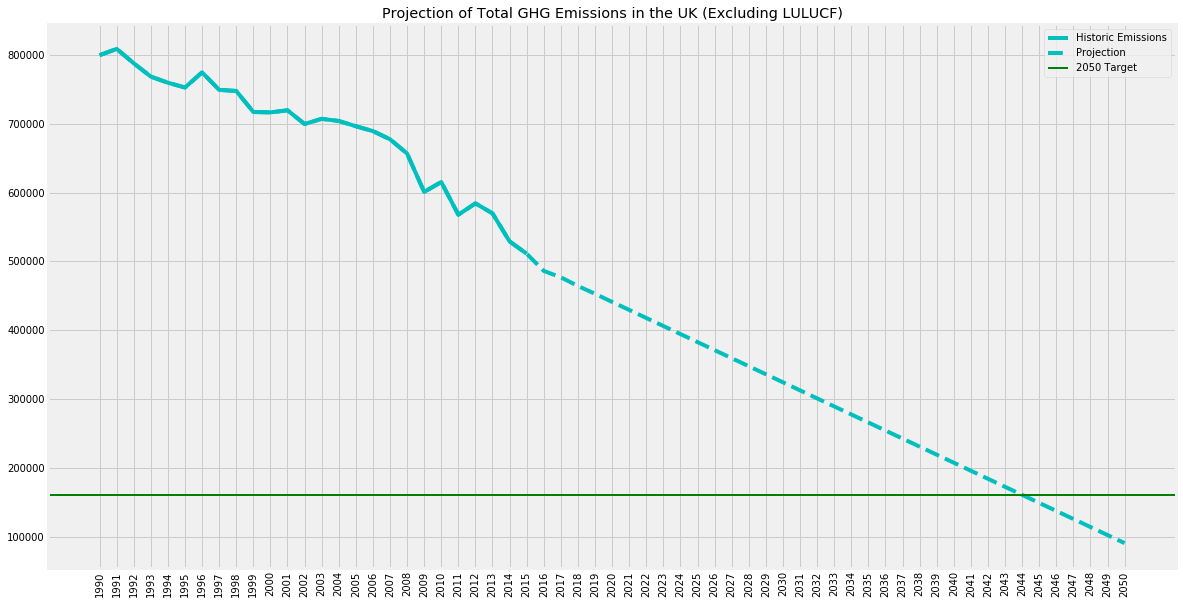

In [93]:
#Define the goal
ndc_goal = -0.80

#Define the projected year
projected_year = 2050

#Determine the amount of emissions the goal implies
ndc_target = oecd_ghg_total_ex['GBR'][1990]*(1.00+ndc_goal)

#Number of years of projection
n=projected_year-2016

forecast = model_fit.forecast(steps=n)[0]

#Turn the dataframe into a series with just the emission values
forecast_values = forecast_series.values.tolist()

#Invert the differenced data
for i in forecast:
    inverted = inverse_difference(forecast_values, i, 1)
    inverted = inverted.tolist()
    forecast_values.append(inverted)

#Creates a list of years for the graph
year = []
for i in range(projected_year -1990+1): 
    year.append(1990+i)
    
#Create a list of realized emission values for the graph
x = []
for i in range(26):
    x.append(dicky_fuller_test_data[i])

plt.figure(figsize=(18,10))
labels = 'Historic Emissions', 'Projection', '2050 Target'
plt.plot(x, color = 'c')
plt.plot(forecast_values, color = 'c',linestyle = '--')

plt.axhline(y = ndc_target, linewidth=2, color = 'g')

x_plot = range(len(year))
plt.xticks(x_plot, year)
plt.xticks(rotation=90)

plt.title('Projection of Total GHG Emissions in the UK (Excluding LULUCF)')
plt.legend(labels, loc="best")

plt.show()

Based on this forecast, the UK will meet its 2050 target of reducing GHG emissions by 80%. 

# Conclusion

This project allowed us to identify the key environmental trends in three OECD countries, the UK, USA and Mexico, it also gave an overview of the Paris Agreement (one of the most important commitments globally), and analysed the specific NDC target for the UK using an ARIMA model, all motivated by the idea of achieving  a green economy. 

Our model suggest that the UK will achieve its NDC target, and is likely to meet its 2050 goal. Although this is a very positive result we must take it with caution as our model is a first attempt to forecast emissions and therefore it still needs refinement and the inclusion of exogenous variables that might come into play. As mentioned earlier the political context, in particular Brexit, might influence the government resource allocation and public expenditure. We did not take into account the possibility for technological change that might reduce emissions faster, or the possibility of economic shocks, among others. 

## Bibliography

Committee on Climate Change . (n.d.). Independent advice to government on building a low-carbon economy and preparing for climate change. Retrieved from Committee on Climate Change official website: https://www.theccc.org.uk/our-impact/ten-years-of-the-climate-change-act/


LSE. (2018, April). Policy brief 10 years of the UK Climate Change Act. Retrieved from London School of Economics official website: http://www.lse.ac.uk/GranthamInstitute/wp-content/uploads/2018/04/10-years-of-UK-Climate-Change-Act-Summary-Policy-Brief.pdf

OECD & IEA. (2018, April). Accounting for baseline targets in NDCs: Issues and options for guidance. Retrieved from OECD official website: https://www.oecd.org/environment/cc/Accounting_for_baselines_targets_in_NDCS.pdf

OECD. (2018). Green Growth. Retrieved from OECD official website: http://www.oecd.org/greengrowth/

SEMARNAT. (2018). Retrieved from Sexta Comunicación Nacional y Segundo Informe Bienal de Actualización ante la convención Marco de las Naciones Unidas sobre el Cambio Climático.

UK Gov. (2018, October 15). Press Release: Climate experts asked for advice on net zero target. Retrieved from UK government official website: https://www.gov.uk/government/news/climate-experts-asked-for-advice-on-net-zero-target

UNFCC. (2015, January 21). President Obama: Climate Change Greatest Threat to Future Generations. Retrieved from UNFCC official website: https://unfccc.int/news/president-obama-climate-change-greatest-threat-to-future-generations

UNFCCC. (2019). The Paris Agreement. Retrieved from United Nations Climate Change: https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement

Washington Post. (2013). Highlights of Obama’s plan to cut carbon. Retrieved from Washington Post: https://www.washingtonpost.com/apps/g/page/national/highlights-of-obamas-plan-to-cut-carbon/263/

Machine Learning Master - How to create an Arima model: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
